# Исследование объявлений о продаже квартир

### Открытие данных и изучение общей информации. 

**1.1 Загружаем данные из файла в датафрейм**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #применяем разделитель-табуляцию для разделения данных в датафрейме 

pd.set_option('max_columns', None) #чтобы показать более 20 столбцов

**1.2 Изучаем общую информацию о датафрейме**

In [2]:
display(data.head(10))
print()
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

Всего 22 столбца с типами данных: bool(2), float64(14), int64(3), object(3)

Проверим на дубликаты)

In [3]:
data.duplicated().sum()

0

**1.3 Построим общую гистограмму для всех числовых столбцов таблицы** (их будет 17)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

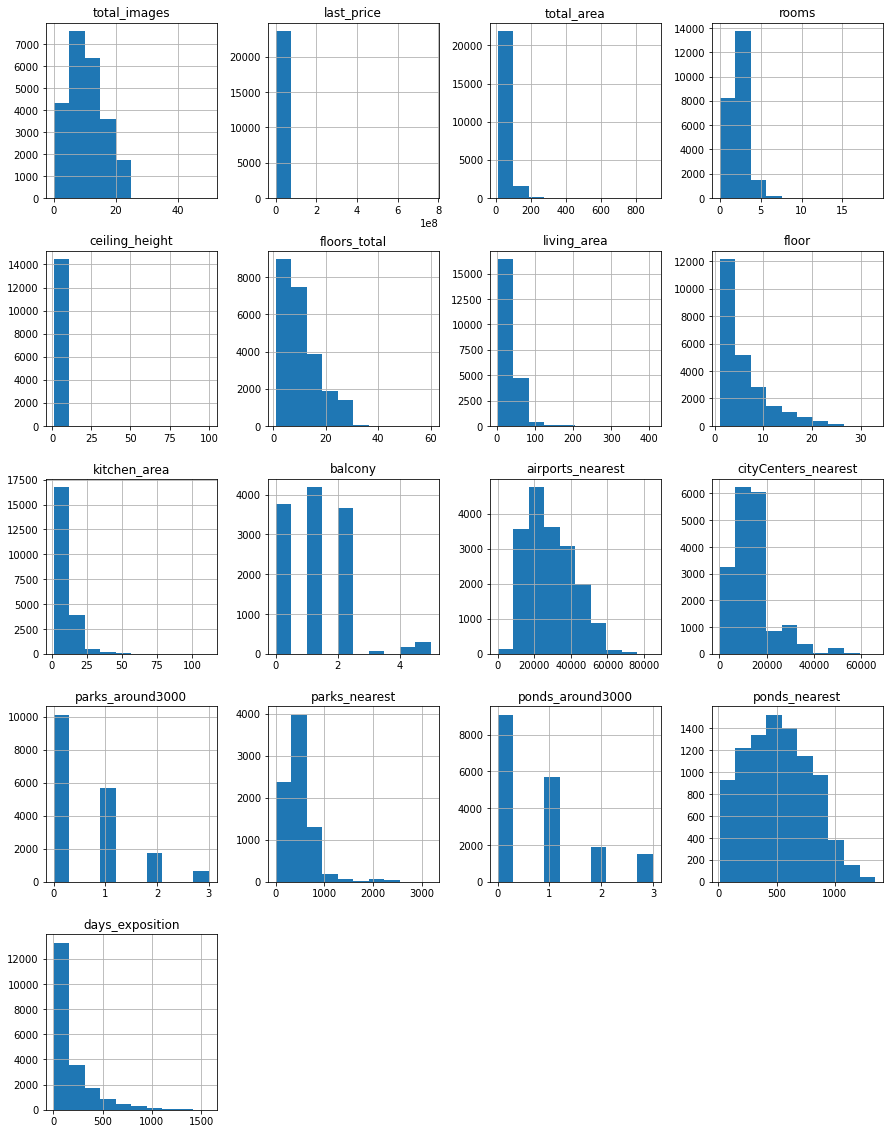

In [4]:
data.hist(figsize=(15, 20))

**Промежуточные выводы по шагу 1**

Всего 22 столбца с типами данных: bool(2), float64(14), int64(3), object(3).
Дубликатов не обнаружено.

Первичный анализ гистограмм:
1. Объявления имеют максимум 25 фотографий. Общее число объявлений примерно равно числу строк датасета - вывод: все стараются выкладывать объявления с фото.
2. Большая часть квартир на момент снятия с публикации имела цену, не превышающую 800.000.000. Гистограмма неинформативна из-за очень высоких цен на некоторые квартиры, что не позволяет увидеть более подробное распределение.
3. Общая площадь большей части квартир (около 22000) составляет до 100 кв.м.
4. Наблюдатся пик для 3 или 4 комнатных квартир. На втором месте идут квартиры с 1 или 2 комнатами.
5. Наблюдается логичный пик для высоты потолков до 10 м. Поскольку таких значений около 14000, то можно сделать вывод, что около 41% людей (от 23600) не указывают этот параметр. Привычные нам 2,5-3 метра скрываются из-за отдельных больших выбросов по аналогии с графиком 2, что не позволяет точнее увидеть распределение.
6. Большая часть квартир продавалась в пятиэтажках и ниже.
7. Большая часть квартир имеет жилплощадь не более 48 кв.м. Это логично, так как большая часть квартир в пятиэтажках, а там наибольшая квартира - трешка с жилплощадью до 45-48 кв.м.
8. Наблюдаем пик по квартирам, находящимся со 1 по 4 этажи. Это обусловлено наличием большей части предложений в пятиэтажках. Продаж по 5 этажам было ниже, что обусловлено отсуствием лифтов, частыми протечками и др. минусами пятых этажей в пятиэтажках.
9. Пик площади кухонь в пределах до 12,5 кв.м., что ожидаемо.
10. Пики по балконам ожидаемы.
11. Пик около 20 км ожидаем, так как основной аэропорт в Питере находится около 20 км от центра.
12. Пик в диапазоне от 6 до 19 км ожидаем, так как расстояние от центра СПб до каждого из его районов составляет от 10 до 20 км. Таким образом, основная доля квартир приходится расположена в чере города.
13. Пик (10000) показывает, что значительная часть квартир не имеет парков в пределах 3 км.
14. Пик от 300 до 600 м - около 4000 квартир имеют парк на таком расстоянии. Можно сказать, что критерием наличия парака поблизости является наличие хотя бы одного парка не более чем в 3 км.
15. Данные гистограммы коррелируют с данными гистограммы (13), что логично, так как обычно если есть парк, то есть и пруд.
16. Гистограмма повторяет данные на гистограмме (14), только в укрупненном масштабе: в пределах 1300-1500 м наблюдаем основную часть квартир.
17. Пик (13000) показывает, что значительная часть квартир продается в течение 150 дней или 5 месяцев.

По поводу направильных типов данных: из 22 столбцов не отображаются 5: locality_name, first_day_exposition, is_apartment и studio, open_plan, так как они имеют типы object и bool соотевтственно. Столбец с датой first_day_exposition должен иметь тип datetime, столбец is_apartment - тип данных bool, после чего столбцы locality_name, is_apartment и studio, open_plan надо будет заменить на числовыми категориями.

### Предобработка данных

**2.1 Поиск и изучение пропущенных значений в столбцах**

Найдем общее количество пропусков по каждому из столбцов датасета:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посчитаем проценты пропусков для анализа их причин:

In [6]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В общем имеем: 
- floors_total, locality_name - очень малый процент пропусков, можно не заполнять эти данные.
- living_area, kitchen_area - пропуски не превышают 10% от объема датафрейма, поэтому по идее также не должны сильно вляить на анализ данных, если их не заполнять.
- ceiling_height, is_apartment, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition имеют большой процент пропусков, которые надо обработать.

В любом случае проанализируем все столбцы и попробуем сначала заполнить пропуски,  если не получится - оставим как есть (потом при необходимости, в зависимости от специфики задачи исследования, можем отбросить).

Причины пропусков

**floors_total** - процент пропусков очень мал (0.36%), скорее всего продавцы забыли его указать

**locality_name** - процент пропусков очень мал - 0.2%, скорее всего продавцы забыли заполнить это поле.

**living_area** - процент пропусков мал (8%), скорее всего у продавцов не было данных на руках при подаче объявления и они не смогли правильно ее рассчитать или из-за неузаконенной перепланировки вопрос о жилплощади остается нерешенным

**kitchen_area** - процент пропусков мал (9.6%), скорее всего из-за неузаконенной перепланировки вопрос о жилплощади остается нерешенным. Кстати, это процент схож с процентом пропусков по жилой площади, что отчасти подтверждает предположение.

**ceiling_height** - продавец может не знать высоту потолков и ему лень ее измерять или он считает это несущественным, а может просто забыл или не увидел эту графу, также могут не заполнять умышленно (если очень низкие). С учетом более чем 38.7% количества пропусков кажется, что этот параметр считают несущественным при заполнении объявления. 

**is_apartment** - процент пропусков 88%, что очень много. Поскольку доля апартаментов на рынке недвижимости невелика, скорее всего продавцы неапартаментов просто не заполняли этот пункт либо могли скрывать этот факт.

**balcony** - процент пропусков 48.6%, скорее всего те, у кого не было балконов, оставили графу незаполненной.


АВТОМАТИЗИРОВАННЫЕ ДАННЫЕ
(считаем, что функции программы по измерению расстояния работали с самого начала формирования датасета)

**airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **ponds_around3000** - процент пропусков существенный - 23.3% и одинаков у четырех столбцов (пропуски совпадают по строкам), что может говорить о том, что продавцы могли ввести название населенного пункта, которого не было в картографической базе данных, либо был превышен возможный критерий, после которого программа уже не считает расстояние, либо произошел программный сбой.

**parks_nearest**, **ponds_nearest** - процент пропусков большой - 65.9 и 61.5% соответственно. Можно предположить, что продавцы могли ввести название населенного пункта, которого не было в картографической базе данных, либо был превышен возможный критерий, после которого программа уже не считает расстояние, либо произошел программный сбой. Процент намного выше предыдущих столбцов, так как в данном случае если значения в столбцах parks_around3000 и ponds_around3000 равняется нулю, то в этих же строках в столбцах parks_nearest и ponds_nearest оказываются пропуски. Пропуски в parks_nearest и ponds_nearest коррелируют с пропусками в столбцах выше.

**days_exposition** - процент пропусков небольшой 13.4%. Возможно был программный сбой из-за того, что квартиры могли снимать и снова ставить на продажу и что-то пошло не так при обновлении данных.

**Столбец floors_total**

Общее число этажей можно узнать проблематично, так как общая площадь, жилая площадь, площадь кухни и высота потолков не могут дать представления об этажности или только очень приближенно. Идеальный вариант - наличие точных данных о локации объекта и база с данными по характеристикам домов. Поскольку таких данных нет и процент очень мал, оставим пропуски.

**Столбец locality_name**

Часть значений locality_name можем восстановить, если проанализировать значения cityCenters_nearest в соответствующих строках. Минимальное расстояние от центра СПб до его границы составляет около 10 км. Следовательно, можем присвоить locality_name значение "Санкт-Петербург" там, где cityCenters_nearest <= 10000.

Количество таких замен будет:

In [7]:
len(data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] <= 10000)])

25

Это половина от всех пропусков, но очень малый процент от общего числа данных. В любом случае произведем замену:

In [8]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] <= 10000), \
         'locality_name'] = 'Санкт-Петербург'

**Столбец living_area**

Заполнить пропуски можно, проанализировав данные по общей площади, площади кухни, числу комнат и жилой площади других строк.

Найдем медианное отношение медиан жилой площади и общей площади для квартир с разным числом комнат:

In [9]:
data1 = data.pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc='median')

In [10]:
data1['ratio'] = data1['living_area'] / data1['total_area']  # series с коэффицинетами
data1

,living_area,total_area,ratio
rooms,,,
0,18.000,26.05,0.690979
1,17.600,36.56,0.481400
2,30.500,53.00,0.575472
3,45.000,73.00,0.616438
4,63.600,99.30,0.640483
5,91.785,146.45,0.626733
6,123.900,184.30,0.672273
7,145.000,214.00,0.677570
8,161.000,235.70,0.683072


Нулевое число комнат - аномалимя, которую устраним позже. Адекватная закономерность наблюдается с 1 до 8 комнат включительно. Тогда заменим все пропуски с числом комнат от 1 до 8 произведением полученного коэффициента на общую площадь:

Но сначала оценим количество таких замен:

In [11]:
for i in range(1, 9):
    print(len(data.loc[(data['rooms'] == i) & (data['living_area'].isna())]))

659
644
448
91
34
6
6
0


Это почти все пропуски (1888 из 1903). Делаем заполнение:

In [12]:
for i in range(1, 9):
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data1.loc[i, 'ratio'] * data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'total_area'] # series с коэффицинетами

In [13]:
data['living_area'].isna().sum()

15

Осталось 15 пропусков

**Столбец kitchen_area**

Попробуем для начала выявить хрущевки по метражу и установить среднее характерное значение площади кухни - 5.5 м. Кухни в таких домах 4.9 - 6 кв.м, общая площадь для однокомнтаных - 28-33 кв.м, двухкомнатных - 38-46, трехкомнатных - 48-58 (https://blog.domclick.ru/post/chto-takoe-khrushevka-plyusy-i-minusy-malogabaritnogo-zhilya?ysclid=lbexvz200216666606). Хотя среди хрущевок есть и 6 и 9-этажки ограничимся высотой 5 этажей как самой многочисленной.

Количество таких квартир:

In [14]:
data[(data['kitchen_area'].isna()) &(data['floors_total'] == 5) & \
     ((data['rooms'] == 3) & (data['total_area'] <= 58) | \
    (data['rooms'] == 2) & (data['total_area'] <= 46) | \
    (data['rooms'] == 1) & (data['total_area'] <= 33))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.356604,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
197,5,1600000.0,46.0,2016-04-22T00:00:00,2,NaN,5.0,26.471698,2,False,False,False,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,28.972603,1,NaN,False,False,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
304,2,2950000.0,32.0,2018-02-01T00:00:00,1,2.50,5.0,15.404814,1,NaN,False,False,NaN,NaN,Санкт-Петербург,42629.0,15133.0,0.0,NaN,0.0,NaN,43.0
322,6,2000000.0,25.0,2017-02-07T00:00:00,1,NaN,5.0,12.035011,5,False,False,False,NaN,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,11,2700000.0,46.0,2018-08-15T00:00:00,2,2.60,5.0,26.471698,3,NaN,False,False,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23530,0,3000000.0,30.0,2018-03-28T00:00:00,1,2.55,5.0,14.442013,3,NaN,False,False,NaN,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23546,20,3599000.0,45.0,2015-08-05T00:00:00,2,NaN,5.0,26.900000,2,NaN,False,False,NaN,0.0,Санкт-Петербург,40744.0,10927.0,3.0,363.0,0.0,NaN,377.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,NaN,5.0,24.975472,1,NaN,False,False,NaN,NaN,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0


Заполним пропуски, кроме квартир, которые являются студиями:

In [15]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == False) & (data['floors_total'] == 5) & \
             ((data['rooms'] == 3) & (data['total_area'] <= 58) | \
            (data['rooms'] == 2) & (data['total_area'] <= 46) | \
            (data['rooms'] == 1) & (data['total_area'] <= 33)), 'kitchen_area'] = 5.5

Далее проведем расчеты, аналогичные стобцу living_area

In [16]:
data1 = (
    data
    .query('studio == False')
    .pivot_table(index=['rooms'], values=['kitchen_area', 'total_area'], aggfunc='median')
)

In [17]:
data1['ratio'] = data1['kitchen_area'] / data1['total_area'] 
data1

,kitchen_area,total_area,ratio
rooms,,,
0,NaN,26.10,NaN
1,9.00,36.60,0.245902
2,8.70,53.00,0.164151
3,9.50,73.00,0.130137
4,11.10,99.30,0.111782
5,15.10,146.45,0.103107
6,19.50,184.30,0.105806
7,20.00,214.00,0.093458
8,25.00,235.70,0.106067


Коэффициент уменьшается, что логично, так как комнат становится больше, а кухня одна

Нулевое число комнат - аномалимя, которую устраним позже. Адекватная закономерность наблюдается с 1 до 7 комнат включительно. Тогда заменим все пропуски с числом комнат от 1 до 7 произведением полученного коэффициента на общую площадь:

Но сначала оценим количество таких замен:

In [18]:
for i in range(1, 8):
    print(len(data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna())]))

750
554
389
99
41
8
7


Делаем заполнение:

In [19]:
for i in range(1, 8):
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data1.loc[i, 'ratio'] * data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'total_area'] # series с коэффицинетами

In [20]:
data['kitchen_area'].isna().sum() #осталось пропусков

212

Проверим, не превышает ли сумма площадей (кухня и жилая) общую площадь:

In [21]:
(data.query('~kitchen_area.isna() and ~living_area.isna()')['kitchen_area'] + \
data.query('~kitchen_area.isna() and ~living_area.isna()')['living_area'] <= \
data.query('~kitchen_area.isna() and ~living_area.isna()')['total_area']).value_counts()

True     23376
False      111
dtype: int64

111 значений не удовлетворяют условию!!! Кроме того, помимо кухни есть еще ванна с туалетом, коридор, прихожая - минимум 7 кв.м для хрущевок (https://design-homes.ru/kvartiry/planirovka-khrushchevki). Посмотрим сколько отсеится значений:

In [22]:
(data.query('~kitchen_area.isna() and ~living_area.isna()')['kitchen_area'] + \
data.query('~kitchen_area.isna() and ~living_area.isna()')['living_area'] + 7 <= \
data.query('~kitchen_area.isna() and ~living_area.isna()')['total_area']).value_counts()

True     21941
False     1546
dtype: int64

1546 значений! Вывод - надо корректировать заполнение пропусков. Например, пропуски в столбце living_area заполним только там, где будет выполняться условие: сумма кухни и жилой площади как минимум на 7 кв.м меньше общей площади. Остальные значения заполним обратно пропусками в living_area:

In [23]:
data.loc[(data['kitchen_area']) + (data['living_area']) + 7 > (data['total_area']), 'living_area'] = np.nan

Проверим опять условие:

In [24]:
data.loc[(data['kitchen_area']) + (data['living_area']) + 7 > (data['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пропуски вернули на место: остался 1561 пропуск в living_area. 342 заполнили.

**Столбец balcony**

Будем считать, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [25]:
data['balcony'].isna().sum() # число пропусков

11519

In [26]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [27]:
data['balcony'] = data['balcony'].fillna(0)

In [28]:
data['balcony'].unique() #посмотрим, что избавились от пропусков

array([0., 2., 1., 5., 4., 3.])

**Столбец is_apartment**

Будем считать, что из-за небольшой доли апартаментов на рынке жилья большое число пропусков обусловлено тем, что люди оставляли этот пункт незаполненным при продаже обычного жилья. Поэтому пропуски можно заменить на False.  

In [29]:
data['is_apartment'].isna().sum() # число пропусков

20924

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [31]:
data['is_apartment'].unique() #посмотрим, что избавились от пропусков

array([False,  True])

**Столбец ceiling_height**

Пропусков много, но выявить зависимость высоты от какой-либо площади проблематично. Но можем попробовать выявить хрущевки по метражу и установить характерную высоту потолков для них - 2.5 м. Кухни в таких домах 4.9 - 6 кв.м, общая площадь для однокомнтаных - 28-33 кв.м, двухкомнатных - 38-46, трехкомнатных - 48-58 (https://blog.domclick.ru/post/chto-takoe-khrushevka-plyusy-i-minusy-malogabaritnogo-zhilya?ysclid=lbexvz200216666606). Хотя среди хрущевок есть и 6 и 9-этажки ограничимся высотой 5 этажей как самой многочисленной.

Количество таких пропусков:

In [32]:
data[(data['kitchen_area'] < 6) & (data['floors_total'] == 5) & (data['ceiling_height'].isna()) & \
     ((data['rooms'] == 3) & (data['total_area'] <= 58) | \
     (data['rooms'] == 2) & (data['total_area'] <= 46) | \
     (data['rooms'] == 1) & (data['total_area'] <= 33))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21,13,3200000.0,31.6,2018-03-14T00:00:00,1,NaN,5.0,16.900000,2,False,False,False,5.7,1.0,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0
141,8,6500000.0,32.6,2019-02-27T00:00:00,1,NaN,5.0,18.500000,5,False,False,False,5.5,0.0,Санкт-Петербург,24764.0,5448.0,0.0,NaN,0.0,NaN,NaN
151,15,2950000.0,44.9,2019-03-20T00:00:00,2,NaN,5.0,28.000000,3,False,False,False,5.4,1.0,посёлок Аннино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,8,2100000.0,31.6,2018-10-16T00:00:00,1,NaN,5.0,17.500000,4,False,False,False,5.5,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,37.0
197,5,1600000.0,46.0,2016-04-22T00:00:00,2,NaN,5.0,26.471698,2,False,False,False,5.5,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,0,2900000.0,42.0,2017-09-29T00:00:00,2,NaN,5.0,28.000000,5,False,False,False,5.0,1.0,Колпино,24262.0,30048.0,1.0,393.0,0.0,NaN,116.0
23546,20,3599000.0,45.0,2015-08-05T00:00:00,2,NaN,5.0,26.900000,2,False,False,False,5.5,0.0,Санкт-Петербург,40744.0,10927.0,3.0,363.0,0.0,NaN,377.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,NaN,5.0,24.975472,1,False,False,False,5.5,0.0,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0
23605,14,3650000.0,41.5,2017-11-11T00:00:00,3,NaN,5.0,NaN,1,False,False,False,5.4,0.0,Санкт-Петербург,13694.0,11965.0,0.0,NaN,0.0,NaN,85.0


Заполняем пропуски:

In [33]:
data.loc[(data['ceiling_height'].isna()) & (data['kitchen_area'] < 6) & (data['floors_total'] == 5) & \
             ((data['rooms'] == 3) & (data['total_area'] <= 58) | \
            (data['rooms'] == 2) & (data['total_area'] <= 46) | \
            (data['rooms'] == 1) & (data['total_area'] <= 33)), 'ceiling_height'] = 2.5

In [34]:
data['ceiling_height'].isna().sum()

8758

Количество пропусков уменьшилось, но ненамного. Возможно заполнение медианой площади кухни не очень объективно, поскольку пятиэтажек много, пропусков устранилось мало.

Как вариант для повышения точности при заполнении площади кухни выше можно было ввести зависимость от общего числа этажей.

Остальные столбцы: 
- airports_nearest, 
- cityCenters_nearest, 
- parks_around3000, 
- parks_nearest, 
- ponds_around3000, 
- ponds_nearest, 
- days_exposition 

заполнять не будем, так как в датасете отсуствуют какие-либо косвенные признаки, по которым можно было бы оценить пропущенные значения. 

Итоговое число пропусков по датафрейму после заполнения:

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8758
floors_total               86
living_area              1561
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              212
balcony                     0
locality_name              24
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.2 Анализ типов данных в каждом из столбцов**

Столбцу is_apartment назначим тип boolean, так как после заполнения пропусков там два значения: True и False.

In [36]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Столбцу first_day_exposition назначим тип данных datatime, так как это позволяет лучше оценивать значения в столбце.

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], \
                                              format='%Y-%m-%d %H:%M:%S')

Столбцам: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, parks_nearest, ponds_nearest, days_exposition назначим тип int, так как количество балконов, число этажей, цену, а также различные расстояния в метрах удобнее приводить в виде целых чисел. 
Метод astype или to_numeric  в данном случае не поможет, будет использовать метод array()

In [38]:
def convert(arr):
    data[arr] = data[arr].astype('Int64')

In [39]:
arr = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', \
      'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']
for item in arr:
    convert(item)

Столбец days_exposition почему-то выдавал ошибку преобразования "cannot safely cast non-equivalent float64 to int64", поэтому обработал его отдельно другими методами:

In [40]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

Датасет будет выглядеть следующим образом:

In [41]:
data.info()
print()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14941 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           22138 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23487 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,98.013699,9,False,False,False,20.691781,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,NaN,12,NaN,5,False,False,False,9.100000,0,городской посёлок Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.600000,6,False,False,False,14.400000,1,посёлок Парголово,52996,19143,0,<NA>,0,<NA>,155
7,5,7915000,71.60,2019-04-18,2,NaN,24,41.203774,22,False,False,False,18.900000,2,Санкт-Петербург,23982,11634,0,<NA>,0,<NA>,<NA>
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.430000,26,False,False,False,8.810000,0,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898,15008,0,<NA>,0,<NA>,289


Всего 22 столбца с типами данных: bool(3), datetime64[ns](1), float64(4), int64(13), object(1)

**2.3 Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов**

Уникальные значения в столбце locality_name:

In [42]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Устранение неявных дубликатов

Есть неявные дубликаты: 
- [поселок, посёлок, коттеджный поселок, коттеджный посёлок]; 
- [поселок городского типа, городской поселок, посёлок городского типа, городской посёлок];
- [садовое товарищество, садоводческое некоммерческое товарищество]. 

Разделим типы населенных пунктов по подкатегориям: СПб, города в пригороде, пгт, посёлок, село, СНТ, деревня.

In [43]:
def local(name): 
    try:
        if ('городско' in name) == True:
            return 'пгт'
        if ('товарищ' in name) == True:
            return 'СНТ'
        if ('село ' in name) == True:
            return 'село'
        if ('дерев' in name) == True:
            return 'деревня'
        if ('Санкт' in name) == True:
            return 'СПб'
        if  name[0].isupper() == True: #принимаем, что только города начинаются сразу
                                        #с большой буквы и не имеют приставки типа населенного пункта
            return 'город в пригороде'        
        else:
            return 'посёлок'
    except:
            return 'нет информации'
    


Добавляем новый столбец с устраненными неявными дубликатами типов населенных пунктов.

In [44]:
data['new_locality'] = data['locality_name'].apply(local)

Проверим предположение о типах населенных пунктов:

In [45]:
data['new_locality'].value_counts()

СПб                  15746
город в пригороде     4287
посёлок               2110
деревня                945
пгт                    550
село                    32
нет информации          24
СНТ                      5
Name: new_locality, dtype: int64

In [46]:
data['new_locality'].value_counts().sum()

23699

Все сходится. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Все же я бы подумал о том, чтобы избавиться от всех названий типов поселений, заменить все буквы "ё" на "е", а также приветси все названия к нижнему регистру

Избавимся от всех названий типов поселений, заменим все буквы "ё" на "е", а также приведем все названия к нижнему регистру:

In [47]:
def local_without_type(name):
    try:
        for i in range(len(name) - 1):
            if name[i].isupper() == True:
                return name[i:].replace('ё', 'е').lower()
    except:
        return np.nan       

Количество названий до преобразования:

In [48]:
data['locality_name'].nunique()

364

In [49]:
data['new_locality'] = data['locality_name'].apply(local_without_type)

In [50]:
data['new_locality'].nunique()

305

Устранили 59 неявных дубликатов.

**2.4 Поиск и устранение редких и выбивающихся значений, либо восстановление корректных значений**

**Столбец total_images**

In [51]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Первый столбец не содержит аномалий: число фотографий от 0 до 50, что имеет место в объявлениях по продаже недвижимости

**Столбец last_price**

In [52]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

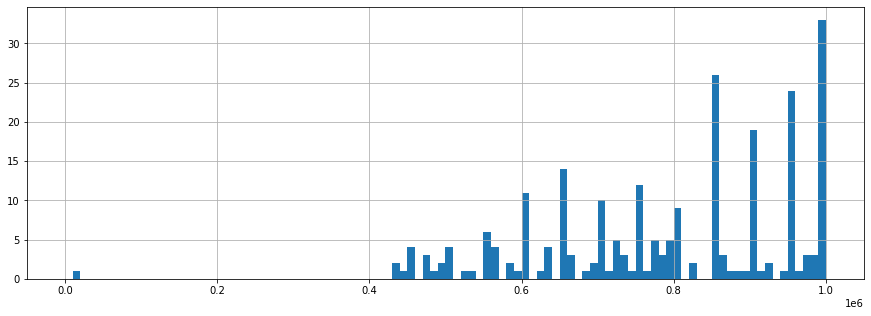

In [53]:
data['last_price'].hist(bins=100, range=(0, 1000000), figsize=(15, 5))

Есть аномалия с ценой на квартиру 12190. Что не соответствует действительности, если только не ошиблись с тремя нулями. Максимальное значение 763000000 нельзя назвать аномальнм, так как это вполне может быть реальная стоимость квартиры, но будем ориентироваться на диаграмму размаха и отфильтруем значения вне "усов":

In [54]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805,0,<NA>,8,санкт-петербург


Удалим аномальный минимум по цене квартиры:

In [55]:
data = data.query('last_price > 12190')

In [56]:
data['last_price'].describe()

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Теперь минимум - 430000, что может соответствовать продаже комнаты в квартире или продаже квартиры далеко от центра, поэтому оставим эти значения.

**Столбец total_area**

In [57]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [58]:
data['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

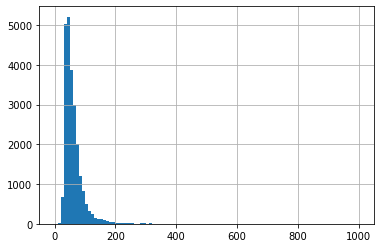

In [59]:
data['total_area'].hist(bins=100, range=(0, 1000))

Диапазон значений в столбце total_area составляет от 12 до 900 кв.м. По большим значениям вопросов нет (https://asninfo.ru/comfortlive/210-samyye-bolshiye-kvartiry-sankt-peterburga, по состоянию на 2021 год правда, но дом построен в 2005 году) Небольшие значения могут быть обусловлены продажей доли в квартире либо это современная малометражка (https://www.novostroy.su/news/edition/top-8-samykh-malenkikh-kvartir-i-apartamentov-v-novostroykakh-peterburga/). Минимальная площадь апартаментов в продаже в Петербурге сейчас начинается от 12,5 кв. м. Будем считать, что аномалий в столбце нет

**Столбец first_day_exposition**

<AxesSubplot:>

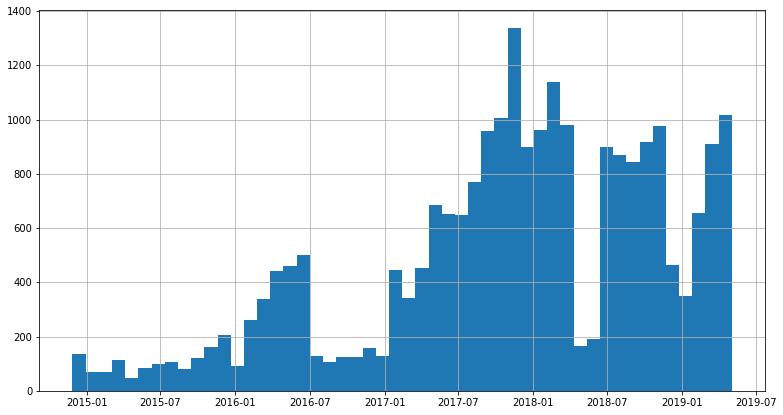

In [60]:
data['first_day_exposition'].hist(bins=50, figsize=(13, 7))

Данные в столбце first_day_exposition приведены с конца 2014 по середину 2019. 
Есть локальные всплески - прирост числа новых объявлений, которые возможно обусловлены проведением рекламных компаний сервисом.

**Столбец rooms**

In [61]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [62]:
data['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Максимум 19 комнат конечно многовато, но реально (https://spb.gdeetotdom.ru/articles/1985863-2013-10-07-samyih-bolshih-kommunalnyih-kvartir-peterburga/). А вот минимум в 0 комнат - это странно. Посмотрим данные по этим строкам

In [63]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,181,мурино
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,кудрово
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171,15015,0,<NA>,2,982,64,санкт-петербург
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115,19292,0,<NA>,1,593,430,парголово
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,посёлок Шушары,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,29,шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405,13222,0,<NA>,1,623,14,санкт-петербург
23442,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,мурино
23554,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090,17092,0,<NA>,2,112,31,санкт-петербург
23592,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,никольское


Посмотрим долю таких значений для квартир с общей площадью меньше 35 кв.м, :

In [64]:
data.query('total_area < 35 and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,181,мурино
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,кудрово
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171,15015,0,<NA>,2,982,64,санкт-петербург
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115,19292,0,<NA>,1,593,430,парголово
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,посёлок Шушары,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,29,шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405,13222,0,<NA>,1,623,14,санкт-петербург
23442,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,мурино
23554,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090,17092,0,<NA>,2,112,31,санкт-петербург
23592,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,никольское


Посмотрим какие студии имеют число комнат больше нуля:

In [65]:
data.query('studio ==True and rooms != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
2389,5,2250000,25.41,2016-06-07,1,NaN,12,17.08,8,False,True,False,NaN,2,Санкт-Петербург,14125,12921,2,328,2,485,26,санкт-петербург
3187,13,3800000,27.00,2016-05-17,1,NaN,14,18.00,8,False,True,False,NaN,2,Санкт-Петербург,50348,16053,0,<NA>,0,<NA>,45,санкт-петербург
4180,4,4500000,34.00,2016-04-25,1,2.8,10,21.00,10,False,True,False,NaN,2,Санкт-Петербург,23609,5299,0,<NA>,1,433,62,санкт-петербург
8683,10,3500000,32.50,2016-05-05,1,3.0,23,29.90,11,False,True,False,NaN,2,Санкт-Петербург,34967,14640,0,<NA>,1,564,45,санкт-петербург
11026,1,2800000,28.00,2016-05-04,1,NaN,26,19.00,6,False,True,False,NaN,2,посёлок Парголово,53511,19687,0,<NA>,0,<NA>,45,парголово
12935,10,2200000,31.00,2016-05-15,1,2.5,8,22.30,5,False,True,False,NaN,1,Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,никольское
15142,2,2700000,30.00,2016-05-10,1,NaN,21,26.00,6,False,True,False,NaN,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,кудрово
18732,4,2400000,22.00,2016-05-06,1,NaN,10,15.00,6,False,True,False,NaN,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,кудрово
20086,0,1550000,22.00,2016-05-11,1,2.7,15,10.94,14,False,True,False,NaN,2,Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,никольское
21702,9,2349000,23.40,2016-05-19,1,2.7,20,16.00,8,False,True,False,NaN,1,деревня Новое Девяткино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,34,новое девяткино


Такие студии есть и все до 35 кв. м, поэтому все остальные студии и однокомнатные квартиры также заполним единицами

In [66]:
data.loc[(data['total_area'] <= 35) & (data['rooms'] == 0), 'rooms'] = 1

Данные выглядят адекватными, интересно посмотреть значения в столбце total_area

In [67]:
data[data['rooms']==0]['total_area'].describe()

count     10.000000
mean      88.293000
std      101.171301
min       38.300000
25%       42.797500
50%       51.300000
75%       72.950000
max      371.000000
Name: total_area, dtype: float64

Посмотрим оставшиеся нулевые значения:

In [68]:
data[data['rooms']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
3458,6,7400000,73.60,2017-05-18,0,NaN,3,50.00,1,False,True,False,NaN,0,Санкт-Петербург,26581,6085,0,<NA>,1,348,60,санкт-петербург
7237,8,2999000,42.63,2017-11-27,0,NaN,16,25.70,2,False,False,True,NaN,2,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,кудрово
9052,12,3890000,38.30,2017-10-06,0,2.70,14,24.42,7,False,True,False,NaN,2,Санкт-Петербург,15493,14289,0,<NA>,0,<NA>,289,санкт-петербург
10008,20,5050000,44.20,2017-09-14,0,2.70,9,32.20,1,False,True,False,NaN,0,Санкт-Петербург,24329,5955,0,<NA>,2,520,69,санкт-петербург
13613,16,8100000,58.40,2019-04-26,0,3.30,7,33.00,6,False,True,False,NaN,0,Санкт-Петербург,14509,8288,0,<NA>,0,<NA>,<NA>,санкт-петербург
15319,4,5970000,43.30,2017-07-20,0,2.80,9,28.20,2,False,True,False,NaN,2,Санкт-Петербург,23617,5223,0,<NA>,1,874,30,санкт-петербург
16130,14,5000000,42.10,2018-04-13,0,NaN,20,30.00,10,False,True,False,NaN,0,Санкт-Петербург,50605,15933,0,<NA>,0,<NA>,170,санкт-петербург
19392,5,71000000,371.00,2018-07-26,0,3.57,7,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257,6060,1,761,1,584,90,санкт-петербург
20082,10,16300000,98.40,2017-11-08,0,3.10,5,60.50,2,False,True,False,NaN,0,Санкт-Петербург,26972,5819,0,<NA>,1,674,537,санкт-петербург
21227,0,8200000,71.00,2017-07-21,0,5.80,5,68.00,5,False,True,False,NaN,0,Санкт-Петербург,20170,1261,2,295,3,366,30,санкт-петербург


Сложно определить количество комнат в оставшихся значениях по общему метражу или жилой площади. Их мало (10), так то можем отфильтровать:

In [69]:
data = data.query('rooms != 0')

**Столбец ceiling_height**

In [70]:
data['ceiling_height'].describe()

count    14933.000000
mean         2.763249
std          1.243374
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [71]:
data.loc[(data['total_area'] <= 35.0) & (data['rooms'] == 0), 'rooms'] = 1


Потолки имеют явный выброс. Зададимся максимальной высотой для потолков двухэтажной квартиры. С учетом высоты одного этажа бизнес-класса 3.5 метра, общую высоту в двухэтажных пентхаусах примем 7 м. Минимальную высоту примем равной 2.5 метра, но с учетом погрешности измерений (пусть будет 5 см) и высоты возможных натяжных потолков, звукоизоляции и тд (пусть будет 5 см) возьмем 2.4. 

аномальные значения:

In [72]:
data.query('2.4 > ceiling_height or ceiling_height > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
227,13,2200000,47.00,2018-01-12,3,2.34,5,28.972603,1,False,False,False,5.500000,0,посёлок Новый Свет,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,новый свет
355,17,3600000,55.20,2018-07-12,2,25.00,5,32.000000,2,False,False,False,9.061132,2,Гатчина,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,259,гатчина
552,11,2999000,33.50,2017-03-30,1,2.00,15,17.500000,6,False,False,False,6.500000,0,Санкт-Петербург,33972,11746,1,520,1,949,270,санкт-петербург
1582,4,4100000,45.60,2016-01-13,2,2.30,9,28.400000,8,False,False,False,7.000000,2,Санкт-Петербург,49152,14977,1,489,1,525,329,санкт-петербург
2572,4,2400000,62.00,2018-12-27,3,2.00,5,40.000000,4,False,False,False,6.000000,1,Луга,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,луга
3148,14,2900000,75.00,2018-11-12,3,32.00,3,53.000000,2,False,False,False,8.000000,0,Волхов,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,волхов
3474,3,1400000,30.00,2018-03-16,1,8.00,5,15.300000,2,False,False,False,7.300000,0,деревня Нурма,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,125,нурма
4212,1,2120000,35.43,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.800000,2,Тосно,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,36,тосно
4643,0,4300000,45.00,2018-02-01,2,25.00,9,30.000000,2,False,False,False,7.000000,1,Санкт-Петербург,12016,13256,1,658,1,331,181,санкт-петербург
4876,7,3000000,25.00,2017-09-27,1,27.00,25,17.000000,17,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28,мурино


Можем предположить, что некоторые значения ввели ошибочно, поставив не там где надо точку. С учетом высоты от 2.4 до 7.0 исправим все значения с 24 до 70, разделив их на 10:

In [73]:
data.loc[(data['ceiling_height'] <= 70) & (data['ceiling_height'] >= 24), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] <= 70) & (data['ceiling_height'] >= 24), 'ceiling_height'] / 10

Остальные значения фильтруем:

In [74]:
len(data.query('2.4 > ceiling_height or ceiling_height > 7'))# число фильтруемых значений

30

In [75]:
data = data.query('2.4 <= ceiling_height <= 7 or ceiling_height.isna()')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23658 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23658 non-null  int64         
 1   last_price            23658 non-null  Int64         
 2   total_area            23658 non-null  float64       
 3   first_day_exposition  23658 non-null  datetime64[ns]
 4   rooms                 23658 non-null  int64         
 5   ceiling_height        14903 non-null  float64       
 6   floors_total          23572 non-null  Int64         
 7   living_area           22102 non-null  float64       
 8   floor                 23658 non-null  int64         
 9   is_apartment          23658 non-null  bool          
 10  studio                23658 non-null  bool          
 11  open_plan             23658 non-null  bool          
 12  kitchen_area          23456 non-null  float64       
 13  balcony         

In [77]:
data['ceiling_height'].describe()

count    14903.000000
mean         2.720473
std          0.275255
min          2.400000
25%          2.500000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

20 аномальных значений восстановили.

Столбец **floors_total**

In [78]:
data['floors_total'].describe()

count    23572.000000
mean        10.675038
std          6.595981
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

«Князь Александр Невский», построенный холдингом «РосСтройИнвест», на сегодняшний день является самым высоким жилым домом Санкт-Петербурга. Его высота составляет 126 м. Здание состоит из 37 этажей

Максимум 60 этажей - аномалия. Посмотрим сколько аномалий:

In [79]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763,49488,2,342,3,614,166,кронштадт
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728,12978,1,793,0,<NA>,45,санкт-петербург


Данных для исправления недостаточно, поэтому фильтруем аномалии:

In [80]:
data = data.query('floors_total <= 37 or floors_total.isna()')

Столбец **living_area**

In [81]:
data['living_area'].describe()

count    22100.000000
mean        35.077469
std         22.938870
min          2.000000
25%         19.000000
50%         30.300000
75%         42.900000
max        427.546729
Name: living_area, dtype: float64

*Учетная норма — минимальный размер площади жилого помещения на человека. В Санкт-Петербурге действуют следующие учетные нормы: — 9 м 2 площади жилого помещения для проживающих в отдельных квартирах и жилых домах; — 15 м 2 общей площади жилого помещения для проживающих в коммунальных квартирах. 

Таким образом, все, что меньше 9 нельзя считать жилым помещением.

Есть аномальные значения, которые меньше 9. Скорее всего это ошибки в записях или люди продают незаконную перепланировку. Узнаем их количество:

In [82]:
data.query('living_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
2309,10,4200000,62.4,2017-06-15,2,2.60,9,8.4,6,False,False,False,41.0,2,посёлок Шушары,23662,29448,0,<NA>,0,<NA>,111,шушары
3242,7,4440000,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272,13073,0,<NA>,0,<NA>,216,санкт-петербург
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453,6521,0,<NA>,1,1012,91,санкт-петербург
16431,13,3799000,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177,4826,1,430,0,<NA>,168,санкт-петербург
17248,20,5300000,33.0,2017-04-14,1,2.70,22,8.9,16,False,False,False,16.1,1,Санкт-Петербург,33803,13671,0,<NA>,0,<NA>,216,санкт-петербург
17582,11,2680000,22.0,2018-08-11,1,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735,11618,1,835,1,652,70,санкт-петербург
19251,19,4050000,33.0,2018-10-15,1,2.50,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258,10592,1,458,0,<NA>,44,санкт-петербург
20994,7,8900000,50.6,2018-10-22,2,2.50,7,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771,8301,1,173,3,126,<NA>,санкт-петербург
21505,9,4100000,35.3,2018-01-10,1,2.75,27,8.5,11,False,False,False,16.1,2,Санкт-Петербург,33977,15076,0,<NA>,0,<NA>,60,санкт-петербург
21758,0,2330000,23.0,2018-01-01,1,NaN,24,2.0,22,False,True,False,NaN,0,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,мурино


Значений немного - отфильтруем их:

In [83]:
data = data.query('living_area >= 9 or living_area.isna()')

In [84]:
data['floor'].describe()

count    23643.000000
mean         5.890327
std          4.882204
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Столбец **is_apartment**

Столбец is_apartment имеет два типа значения, пропуски мы убрали, аномалий нет, там булевы значения. идем дальше.

Столбец **studio**

Столбец studio имеет два типа значения, пропусков нет, идем дальше.

In [85]:
len(data.query('studio.isna()'))

0

Столбец **open_plan**

Столбец open_plan имеет два типа значения, пропусков нет, идем дальше.

In [86]:
len(data.query('open_plan.isna()'))

0

Столбец **kitchen_area**

Если тип cтудия, то площади кухни там быть не должно. Узнаем сколько таких вариантов:

In [87]:
data.query('studio == True and ~kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality


Аномальных значений нет

In [88]:
data['kitchen_area'].describe()

count    23443.000000
mean        10.476209
std          5.807108
min          1.300000
25%          7.000000
50%          9.098361
75%         11.810000
max        121.500000
Name: kitchen_area, dtype: float64

Минимальная площадь кухни, допускаемая нормативом для однокомнатных квартир — 4.9 кв.м.
Оценим число аномалий, которые меньше 4.9:

In [89]:
data.query('kitchen_area < 4.9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
298,9,2650000,42.8,2017-04-25,2,2.50,5,30.000000,3,False,False,False,4.500000,0,Гатчина,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,гатчина
422,8,1700000,55.2,2018-03-24,3,2.50,5,38.500000,5,False,False,False,4.500000,0,Кириши,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,кириши
906,15,2600000,27.0,2017-07-10,1,2.75,23,18.000000,18,False,False,False,2.000000,0,Санкт-Петербург,22131,17459,0,<NA>,1,411,10,санкт-петербург
1834,4,1400000,43.0,2019-03-28,2,2.50,5,30.000000,2,False,False,False,4.500000,0,Сясьстрой,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,сясьстрой
1853,10,3100000,38.3,2017-12-12,2,2.70,2,NaN,1,False,False,False,4.000000,0,посёлок Песочный,56095,25867,0,<NA>,0,<NA>,14,песочный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22675,9,2600000,42.4,2017-08-18,2,2.50,5,27.600000,5,False,False,False,4.800000,1,Гатчина,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,116,гатчина
22839,14,3350000,27.0,2018-11-03,1,2.70,16,12.997812,6,False,False,False,4.000000,2,Санкт-Петербург,41935,9551,0,<NA>,0,<NA>,35,санкт-петербург
22849,6,2380000,25.0,2016-03-22,1,NaN,25,NaN,15,False,False,False,4.000000,1,посёлок Шушары,13461,19247,0,<NA>,1,351,140,шушары
23110,1,2900000,34.0,2018-02-01,2,2.90,2,20.000000,1,False,False,False,4.000000,0,посёлок Стрельна,27006,23832,0,<NA>,2,872,196,стрельна


Скорее всего люди измеряли кухню с погрешностью, не смотря в техплан.

Отфильтруем эти значения:

In [90]:
data = data.query('kitchen_area >= 4.9 or kitchen_area.isna()')

In [91]:
data['balcony'].describe()

count    23543.000000
mean         0.591131
std          0.959069
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Столбец **balcony**

Столбец balcony мы анализировали: пропуски заполнены, аномалий нет, идем дальше.

Столбец **locality_name**

Столбец locality_name мы анализировали: значения были перегруппированы с учетом неявных дубликатов и помещены в новый столбец new_locality:

In [92]:
data['new_locality'].value_counts()

санкт-петербург    15659
мурино               585
кудрово              470
шушары               437
всеволожск           397
                   ...  
вахнова кара           1
меньково               1
тойворово              1
пижма                  1
лужайка                1
Name: new_locality, Length: 304, dtype: int64

Квартира в СНТ - необычно, но такие случаи бывают, поэтому аномалиями их не назовешь.

Данные в столбце airports_nearest адекватные, без аномалий, если считать, что нулевое расстояние имеется в виду нахождения жилого дома практически перед ограждением аэропорта

In [93]:
data['airports_nearest'].describe()

count    18051.000000
mean     28798.835189
std      12617.253312
min          0.000000
25%      18590.000000
50%      26736.000000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Узнаем сколько домов вплотную к аэропорту:

In [94]:
data.query('airports_nearest < 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0,22801,0,<NA>,0,<NA>,60,санкт-петербург


Скорее всего это все-таки аномалия, так как у квартиры даже нет фото, исключим ее:

In [95]:
data = data.query('airports_nearest > 500 or airports_nearest.isna()')

Переходим к столюцу cityCenters_nearest

In [96]:
data['cityCenters_nearest'].describe()

count    18073.000000
mean     14182.382338
std       8586.674234
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:title={'center':'Расстояние до центра'}, ylabel='Frequency'>

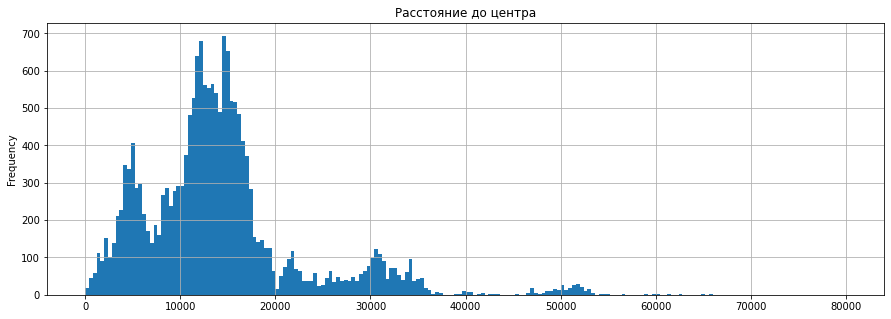

In [97]:
data['cityCenters_nearest'].plot(kind='hist', title='Расстояние до центра', grid=True, bins=200, range=(0, 80000), figsize=(15, 5))

Аномалий по значениям не наблюдается

Переходим к столюцу parks_around3000

In [98]:
data['parks_around3000'].describe()

count    18074.000000
mean         0.612205
std          0.802356
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

<AxesSubplot:title={'center':'Парки в пределах 3 км'}, ylabel='Frequency'>

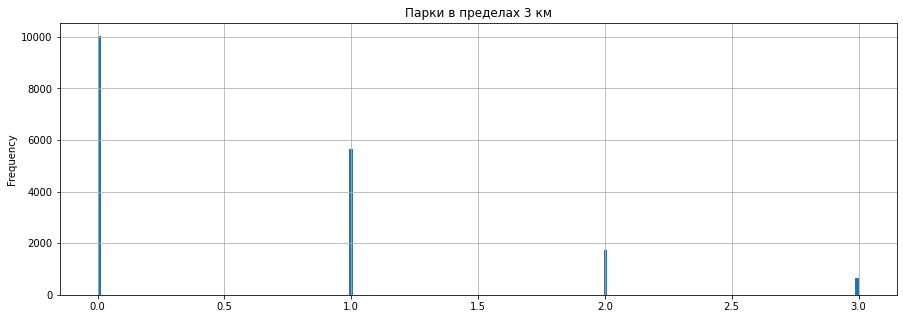

In [99]:
data['parks_around3000'].plot(kind='hist', title='Парки в пределах 3 км', grid=True, bins=200, range=(0, 3), figsize=(15, 5))

Аномалий по значениям не наблюдается

Переходим к столюцу parks_nearest

In [100]:
data['parks_nearest'].describe()

count    8042.000000
mean      490.814474
std       342.852374
min         1.000000
25%       287.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Парки поблизости'}, ylabel='Frequency'>

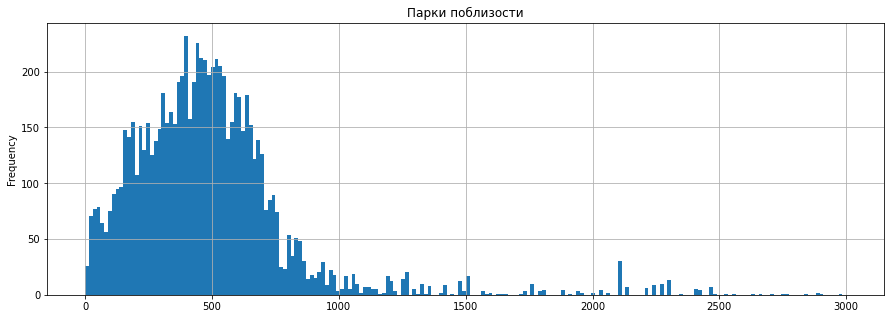

In [101]:
data['parks_nearest'].plot(kind='hist', title='Парки поблизости', grid=True, bins=200, range=(0, 3000), figsize=(15, 5))

Ярко выраженных аномалий по значениям не наблюдается

Переходим к столюцу ponds_around3000

In [102]:
data['ponds_around3000'].describe()

count    18074.000000
mean         0.769835
std          0.938268
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

<AxesSubplot:title={'center':'Пруды в пределах 3 км'}, ylabel='Frequency'>

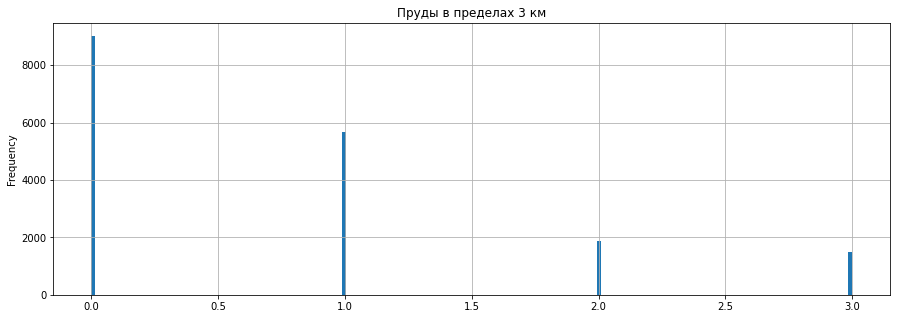

In [103]:
data['ponds_around3000'].plot(kind='hist', title='Пруды в пределах 3 км', grid=True, bins=200, range=(0, 3), figsize=(15, 5))

Аномалий по значениям не наблюдается

Переходим к столюцу ponds_nearest

In [104]:
data['ponds_nearest'].describe()

count    9051.000000
mean      517.900563
std       277.411774
min        13.000000
25%       294.000000
50%       502.000000
75%       728.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:title={'center':'Пруды поблизости'}, ylabel='Frequency'>

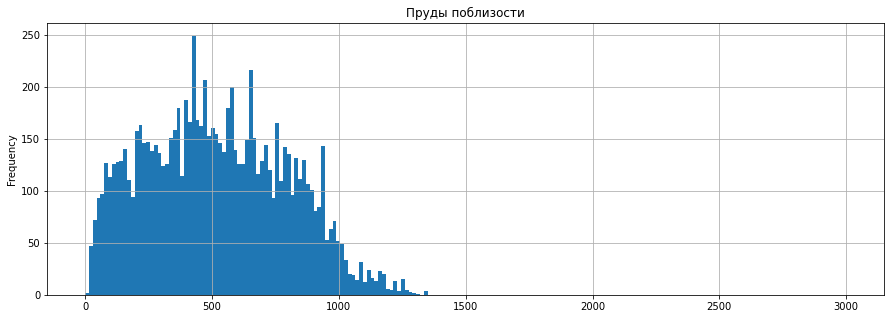

In [105]:
data['ponds_nearest'].plot(kind='hist', title='Пруды поблизости', grid=True, bins=200, range=(0, 3000), figsize=(15, 5))

Аномалий по значениям не наблюдается

Переходим к столюцу days_exposition

In [106]:
data['days_exposition'].describe()

count    20379.000000
mean       181.211492
std        220.002859
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Время размещения'}, ylabel='Frequency'>

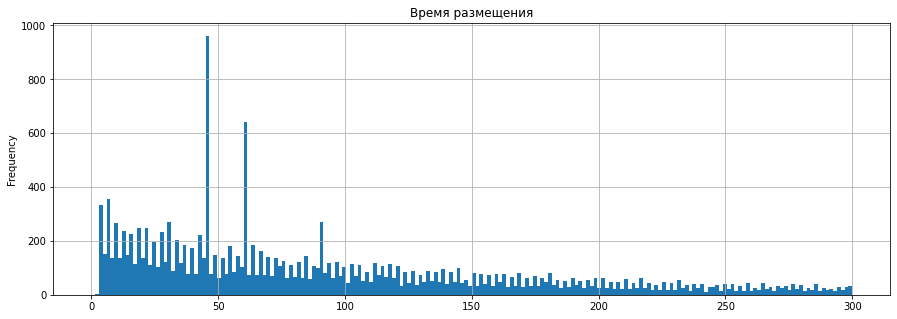

In [107]:
data['days_exposition'].plot(kind='hist', title='Время размещения', grid=True, bins=200, range=(0, 300), figsize=(15, 5))

<AxesSubplot:title={'center':'Время размещения'}, ylabel='Frequency'>

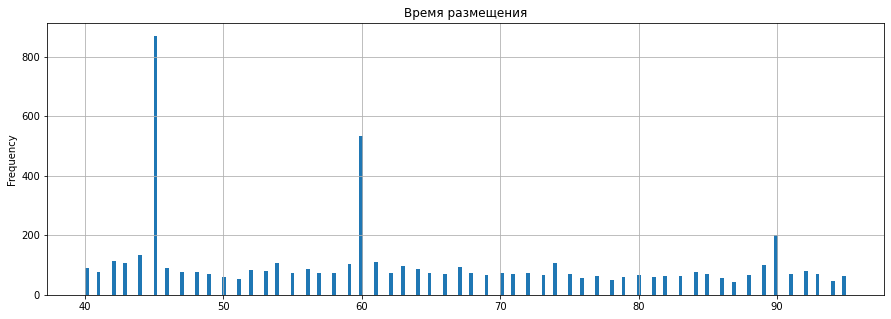

In [108]:
data['days_exposition'].plot(kind='hist', title='Время размещения', grid=True, bins=200, range=(40, 95), figsize=(15, 5))

Есть три аномально больших значения: 45, 60 и 90 дней. Также есть аномалии чуть меньше: 7, 30, 75, 90. Вообще эти всплески идут с периодом ровно две недели, кроме первого. Но если первые идут в соответствии с общим трендом по спадающей, то три аномалии 45, 60 и 90 явно выбиваются из общего тренда. 

Проанализируем даты размещения этих объявлений:

<AxesSubplot:xlabel='first_day_exposition', ylabel='days_exposition'>

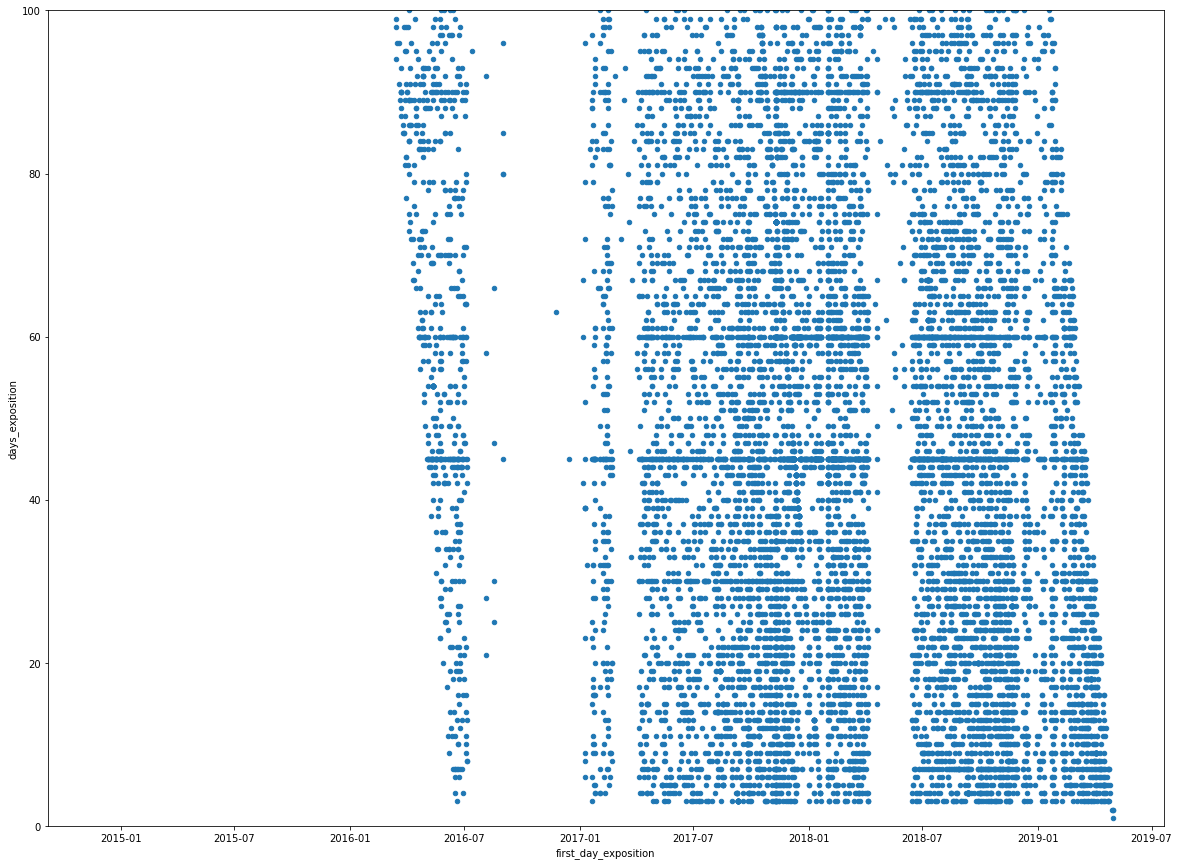

In [109]:
data[['days_exposition', 'first_day_exposition']].plot(x='first_day_exposition', y='days_exposition', ylim = (0, 100), kind='scatter', figsize=(20, 15))

Пробелы между синими полосками - это периоды отсутствия прироста новых объявлений, возможно развитие и финансирование сервиса приостанавливалось или были другие трудности. Также возможно не проводились рекламные компании.
Периоды 30, 45, 60, 90 видны как сплошные синие полоски, но сделать выводы проблематично. Видно, что они идут на протяжении нескольких лет 2016, 2017. 2018, 2019. Можно предположить, что это была рекламная акция, где давалась скидка на размещение объявления на определенные периоды времени (7, 30, 45, 60 и 90). Время заканчивалось и объявления автоматически закрывались.

(0.0, 2.0)

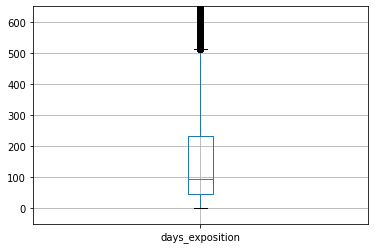

In [110]:
data.boxplot(column=['days_exposition']) 
plt.ylim(-50, 650)
plt.xlim(0, 2) 

По диаграмме размаха можем наблюдать, что имеется достаточное количество выборосов-те значения, которые находятся за пределами усов.

Количество таких аномалий:

In [111]:
len(data.loc[(data['days_exposition'] == 45) | (data['days_exposition'] == 60) | \
         (data['days_exposition'] == 90)])

1606

In [112]:
len(data.loc[(data['days_exposition'] == 45) | (data['days_exposition'] == 60) | \
         (data['days_exposition'] == 90)]) / \
        len(data['days_exposition'])

0.06821850310084104

Доля аномалий меньше 10%. Исключим их.

In [113]:
data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 or days_exposition.isna()')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21936 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21936 non-null  int64         
 1   last_price            21936 non-null  Int64         
 2   total_area            21936 non-null  float64       
 3   first_day_exposition  21936 non-null  datetime64[ns]
 4   rooms                 21936 non-null  int64         
 5   ceiling_height        14004 non-null  float64       
 6   floors_total          21854 non-null  Int64         
 7   living_area           20513 non-null  float64       
 8   floor                 21936 non-null  int64         
 9   is_apartment          21936 non-null  bool          
 10  studio                21936 non-null  bool          
 11  open_plan             21936 non-null  bool          
 12  kitchen_area          21755 non-null  float64       
 13  balcony         

<AxesSubplot:title={'center':'Время размещения'}, ylabel='Frequency'>

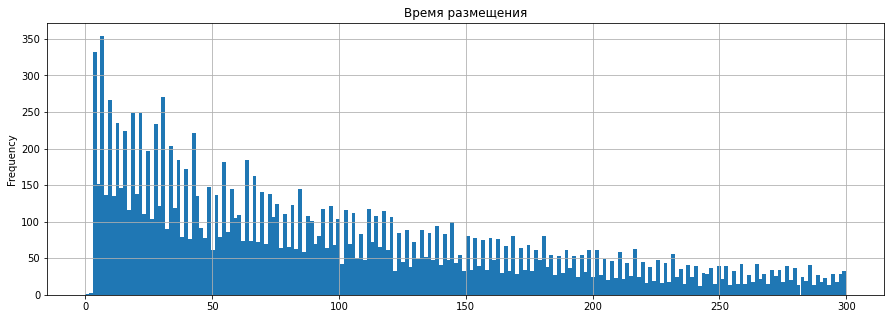

In [115]:
data['days_exposition'].plot(kind='hist', title='Время размещения', grid=True, bins=200, range=(0, 300), figsize=(15, 5))

**Промежуточные выводы по шагу 2**

Проведена предобработка данных:

2.1 Поиск и заполнение пропусков во всех столбцах датафрейма
Заполнены пропуски в столбцах: 
- locality_name - 25 пропусков из 49 (квартирам в радиусе СПб около 10 км от центра присвоено наименование 'Санкт-Петербург');
- kitchen_area - 229 пропусков из 2278 заменены на 5.5 кв.м (фильтрацией по общему метражу, числу комнат и этажности), характерных для хрущевок; 
- 1848 пропусков из оставшихся заменены заполнением медианным соотношением kitchen_area/total_area, умноженным на total_area;
- living_area - 1888 пропусков из 1903 (заполнение медианным соотношением living_area/total_area, умноженным на total_area);

- проверил, не превышает ли суммарная площадь (кухни и жилой) общую площадь квартиры - оказалось, что 1546 значений не удовлетворяют! В итоге 1546 значений living_area оставил как пропуски, заполнил медианным значением лишь 342;

- balcony - все 11519 пропусков заменены нулями, в предположении, что продавцы не заполняли поле из-за отсуствия балконов;
- is_apartment - все 20924 пропуска заменены значением False, в предположении, что большая часть недвижимости - это квартиры, поэтому продавцы не заполняли поле;
- ceiling_height - 437 из 9185 пропусков (заполняли значением 2,5 м, характерным для хрущевок).

2.2 Изменение типов данных в столбцах:
- Столбцу is_apartment назначим тип boolean, так как после заполнения пропусков там два значения: True и False.
- Столбцу first_day_exposition назначим тип данных datatime, так как это позволяет лучше оценивать значения в столбце в дальнейшем.
- Столбцам: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, parks_nearest, ponds_nearest, days_exposition назначим тип int, так как количество балконов, число этажей, цену, а также различные расстояния в метрах удобнее приводить в виде целых чисел. 
- Получили: всего 22 столбца с типами данных: bool(3), datetime64ns, float64(4), int64(13), object(1)

2.3 Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов:
Есть неявные дубликаты: 
- [поселок, посёлок, коттеджный поселок, коттеджный посёлок]; 
- [поселок городского типа, городской поселок, посёлок городского типа, городской посёлок];
- [садовое товарищество, садоводческое некоммерческое товарищество]. 
Разделили типы населенных пунктов по подкатегориям: СПб, города в пригороде, пгт, посёлок, село, СНТ, деревня.

- учел возможные дубликаты в непосредственных названиях населенных пунктов: поменял "ё" на "е", удалил типы населенных пунктов, привел все названия к нижнему регистру. Итог: устранено 59 неявных дубликатов.


2.4 Поиск и устранение редких и выбивающихся значений, либо восстановление корректных значений:
- last_price - есть аномалия с ценой на квартиру 12190. Что не соответствует действительности, если только не ошиблись с тремя нулями, ее отфильтровали (+1). Максимальное значение 763000000 соответствует реальности, его оставили.
- total_area - 12 кв.м - минимум, 900 кв.м - максимум, но такие и те, и те квартиры есть на рынке недвижимости в СПб, поэтому эти значения оставили.
- first_day_exposition - есть отдельные всплески, но аномалиями их не назовешь, скорее всего это рекламные кампании сервиса, которые привлекли больше обычного, ничего не фильтровали.
- rooms - 197 нулевых аномалий. 187 из 197 имеют площадь меньше 35, поэтому записали единицы вместо нулей, так как это однокомнатные квартиры или студии. Оставшиеся 10 значений никак не заполнить, их отфильтровали (+10)
- ceiling_height - 50 аномалий меньше 2,4 м или больше 7 м. 20 значений исправили (от 24 до 70 делили на 10), остальные 30 отфильтровали (+30).
- floors_total - самое высокое жилое здание в СПб на 2019 год - 37 м, поэтому отфильтровали 2 аномалии (+2).
- living_area - 13 аномалий меньше 9 кв.м, что меньше положенной нормы- отфильтровали (+13).
- kitchen_area - 100 аномалий с площадью меньеш 4.9 кв.м - отфильтровали (+100).
- airports_nearest - 1 аномалия с 0 фото на расстоянии 0 метров от аэропорта - фильтруем (+1).
- days_exposition - аномалии 45, 60 и 90 дней, когда резко заканчиваются снимаются объявления, что обусловлено возможно рекламными акциями - размещение со скидкой объявления в течение этих периодов. Доля таких значений 6.8%, фильтруем (+1606).


Всего удалено: 1+10+30+2+13+100+1+1606 = 1763 значения. Это 1763/23699 = 0.074 или 7.4% от общего объема данных. Значение 10% не превышено. Все в норме. Осталось в датасете 21936 значений. Теперь можем исследовать данные.

### Добавление в таблицу новых столбцов

Цена одного квадратного метра:

In [116]:
data['price_sq_metr'] = data['last_price'] // data['total_area'] #используем оператор целочисленного деления

In [117]:
data['price_sq_metr'] = data['price_sq_metr'].astype('Int64')

День недели публикации объявления 

In [118]:
data['day_week_expos'] = data['first_day_exposition'].dt.weekday

In [119]:
data['day_week_expos'] = data['day_week_expos'].replace([0, 1, 2, 3, 4, 5, 6], \
                        ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

Месяц публикации объявления

In [120]:
data['month_expos'] = data['first_day_exposition'].dt.month

Год публикации объявления

In [121]:
data['year_expos'] = data['first_day_exposition'].dt.year

Тип этажа квартиры со значениями «первый», «последний», «другой»

In [122]:
def floors(column):
    
    if column[1] < 0 or column[0] < 0:
        return 'нет информации'
    if column[1] == column[0]:
        return 'последний'
    if column[1] == 1:
        return 'первый'
    else:
        return 'другой'

In [123]:
data['floors_total'] = data['floors_total'].fillna(-1) #чтобы функция отработала логично, заменим пропуски отриц значениями

In [124]:
data['type_of_floor'] = data[['floors_total', 'floor']].apply(floors, axis=1)

In [125]:
len(data.query('type_of_floor == "нет информации"'))/len(data['type_of_floor'] )

0.0037381473377097007

Процент несущественный, поэтому перенесм их в категорию 'другой'

In [126]:
def floors(column):
    
    if column[1] < 0 or column[0] < 0:
        return 'другой'
    if column[1] == column[0]:
        return 'последний'
    if column[1] == 1:
        return 'первый'
    else:
        return 'другой'

In [127]:
data['type_of_floor'] = data[['floors_total', 'floor']].apply(floors, axis=1)

Расстояние до центра города в километрах

In [128]:
data['cityCenters_nearest'] = np.floor(data['cityCenters_nearest'] / 1000).astype('Int64')

**Промежуточные выводы по шагу 3:**

Добавили все необходимые столбцы, в категорию "другой" для столбца type_of_floor занесли также значения, когда не было данных или по общему числу этажей, или по этажу квартиры.

### Исследовательский анализ данных

**Общая площадь**

<AxesSubplot:title={'center':'Общая площадь квартир'}, ylabel='Frequency'>

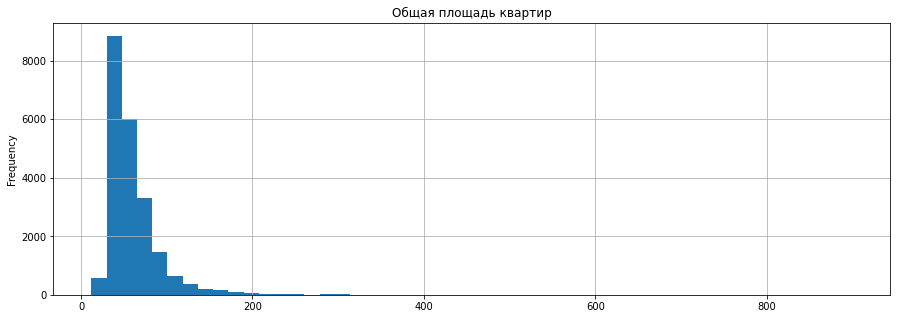

In [129]:
data['total_area'].plot(kind='hist', title='Общая площадь квартир', grid=True, bins=50, figsize=(15, 5))

Сделаем гистограмму ближе, уменьшив диапазон общей площади квартир:

<AxesSubplot:title={'center':'Общая площадь квартир'}, ylabel='Frequency'>

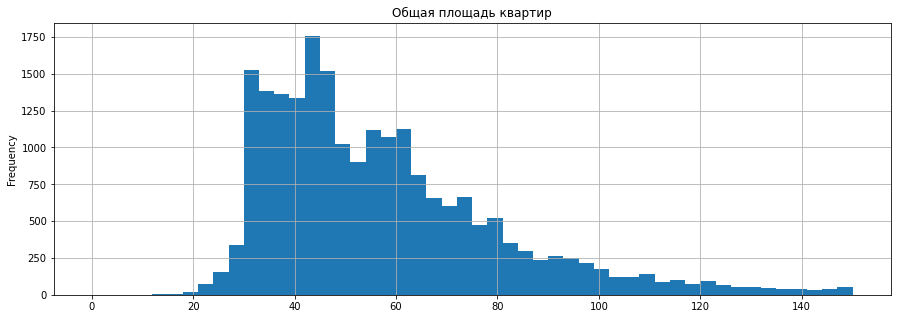

In [130]:
data['total_area'].plot(kind='hist', title='Общая площадь квартир', grid=True, bins=50, range=(0, 150), figsize=(15, 5))

Два локальных пика соответствуют квартирам с общей площадью примерно от 30 и 44 кв.м, что по метражу соответствует одно- и двухкомнатным квартирам в пятиэтажках. Отдельные значения достигают нескольких сотен метров, из-за чего первоначальная гистограмма не очень информативна.

**Жилая площадь**

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

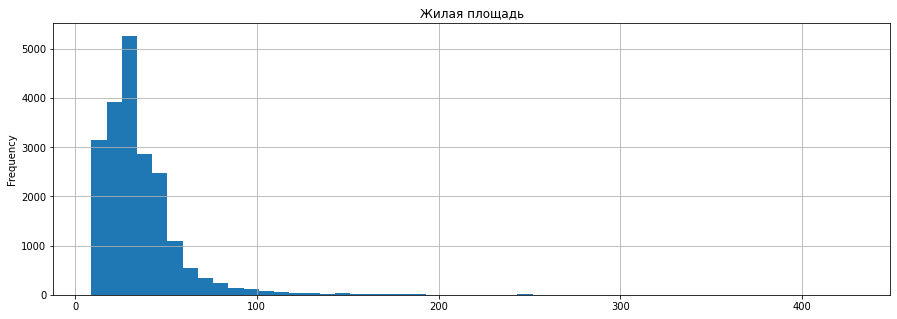

In [131]:
data['living_area'].plot(kind='hist', title='Жилая площадь', grid=True, bins=50, figsize=(15, 5))

Сделаем гистограмму ближе, уменьшив диапазон жилой площади:

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

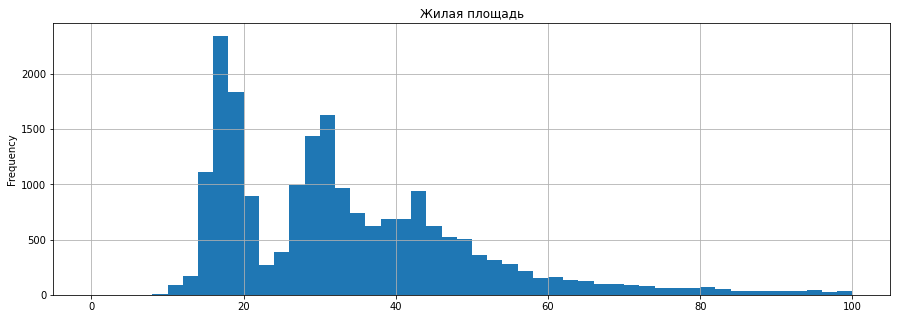

In [132]:
data['living_area'].plot(kind='hist', title='Жилая площадь', grid=True, bins=50, range=(0, 100), figsize=(15, 5))

Большая часть продаваемых квартир имеет жилплощадь 18-20 кв.м. Это соответствует однокомнатной квартире или студии, видимо эти квартиры очень популярны у питерцев. Второй локальный пик соответствует 32 кв.м  - двухкомнатная квартира, третий локальный пик 44 кв.м - трехкомнатная квартира. В целом график коррелирует с графиком общей площади. Опять преобладающие пятиэтажки дают о себе знать. 

**Площадь кухни**

<AxesSubplot:title={'center':'Кухня'}, ylabel='Frequency'>

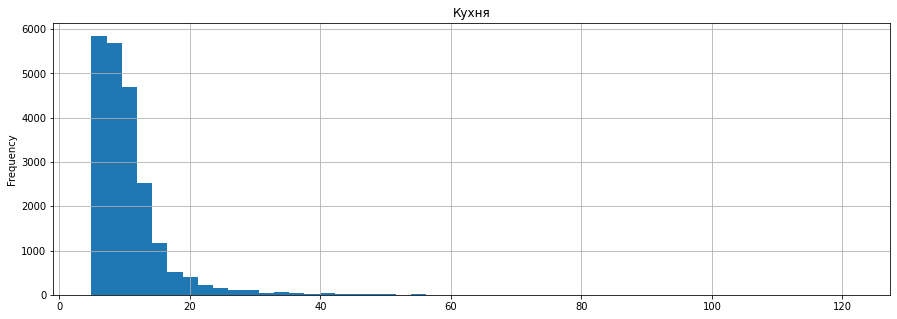

In [133]:
data['kitchen_area'].plot(kind='hist', title='Кухня', grid=True, bins=50, figsize=(15, 5))

Пик соответствует 5-7 кв.м, что объясняется также преобладанием пятиэтажек, у которых кухни таких размеров вне зависимости от числа комнат. Кухни около 8 - 12 кв.м тоже не редкость - это более новые пятиэтажки и другие относительно недорогие многоэтажки.

**Цена объекта**

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

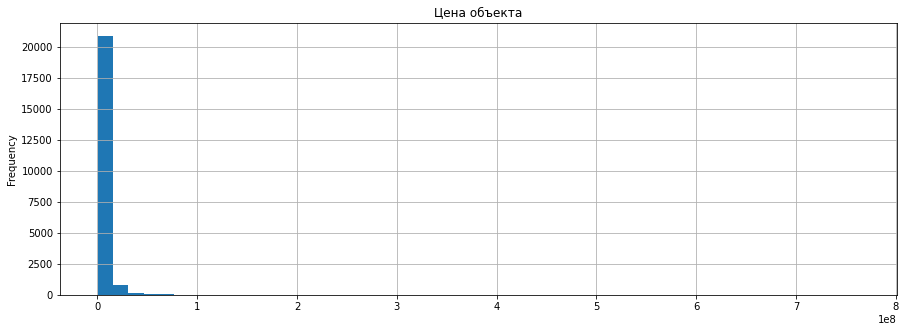

In [134]:
data['last_price'].plot(kind='hist', title='Цена объекта', grid=True, bins=50, figsize=(15, 5))

Сделаем гистограмму ближе, уменьшив диапазон цен:

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

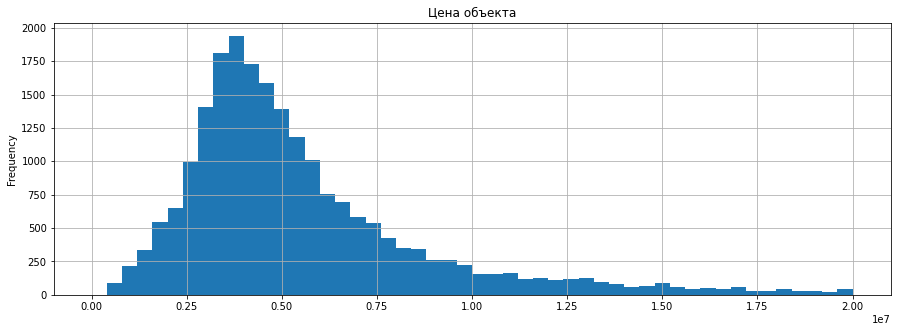

In [135]:
data['last_price'].plot(kind='hist', title='Цена объекта', grid=True, bins=50, range=(0, 20000000), figsize=(15, 5))

Пик соответствует 3.7 - 4 млн руб. По всей вероятности он сформирован популярными одно- и двухкомнатными квартирами в пятиэтажках.

**Количество комнат**

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

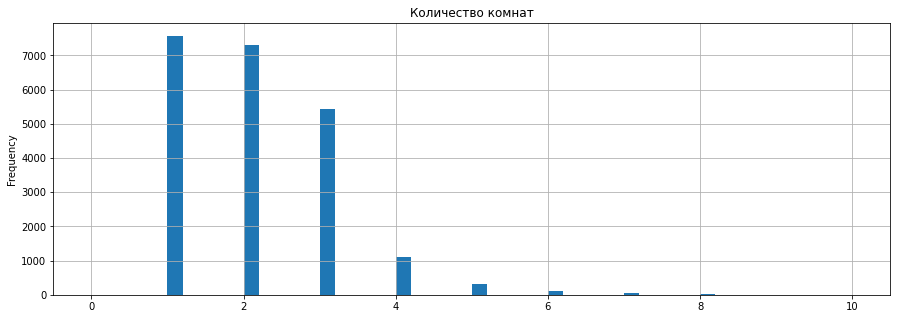

In [136]:
data['rooms'].plot(kind='hist', title='Количество комнат', grid=True, bins=50, range=(0, 10), figsize=(15, 5))

Преобладают однушки и двушки. Далее - трешки. Все ожидаемо и коррелирует с предыдущими гистограммами.

**Высота потолков**

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

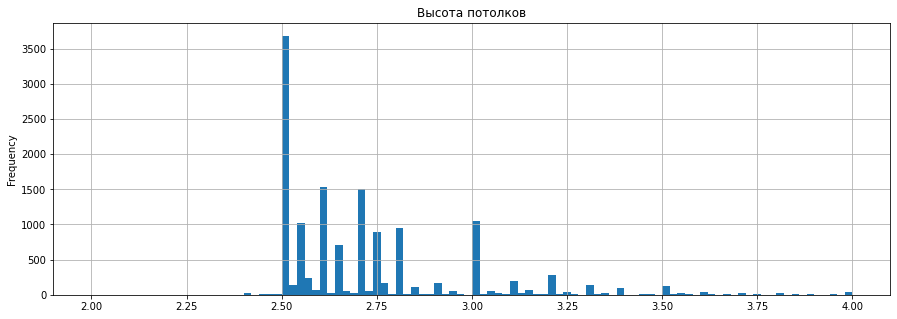

In [137]:
data['ceiling_height'].plot(kind='hist', title='Высота потолков', grid=True, bins=100, range=(2, 4), figsize=(15, 5))

Пик соответствует 2.5 м. Высота потолков в пятиэтажках 2.48 - 2.5 - все сходится. Есть локальный максимум на уровне 3 м - это в основном сталинки или бизнес-класс. в СПб много старинных домов, поэтому ничего удивиительного.

**Этаж квартиры**

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

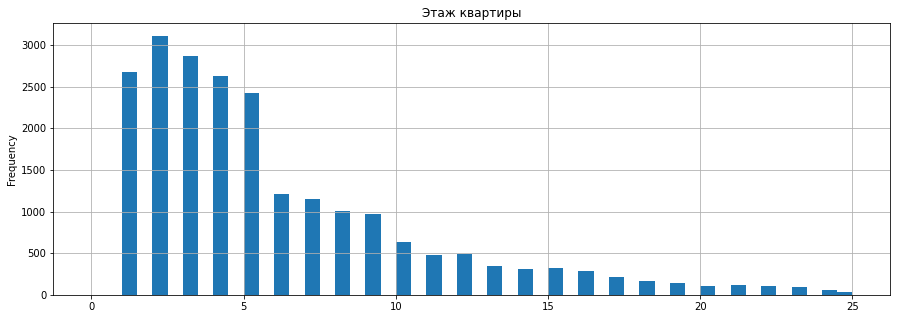

In [138]:
data['floor'].plot(kind='hist', title='Этаж квартиры', grid=True, bins=50, range=(0, 25), figsize=(15, 5))

Пик соответствует квартирам на 1, 2, 3, 4 и 5 этажах. И здесь пятиэтажки вносят свои коррективы. Причем проданных квартир на 5 этажах по сравнению с другими пиками меньше, что логично, так как на последних этажах протечки и без лифтов туда трудно подниматься. Популярнее всего продаются квартиры на 2 и 3 этажах пятиэтажек - меньше подниматься по лестнице))

**Тип этажа квартиры**

<AxesSubplot:xlabel='type_of_floor'>

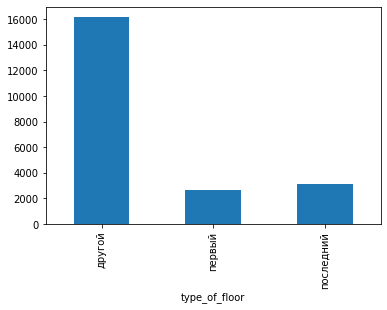

In [139]:
data.groupby('type_of_floor')['type_of_floor'].count().plot(kind='bar')

Логично, что первые и последние этажи домов не пользуются особой популярностью и имеют схожую статистику по продажам. Остальные этажи продаются намного лучше. При этом последний этаж все-таки предпочтительнее первого, что можно объяснить панорамным видом из окна, отсутствием соседей сверху. К тому же первый этаж - сырость от подвала и риск ограбления.

**Общее количество этажей в доме**

<AxesSubplot:title={'center':'Общее количество этажей в доме'}, ylabel='Frequency'>

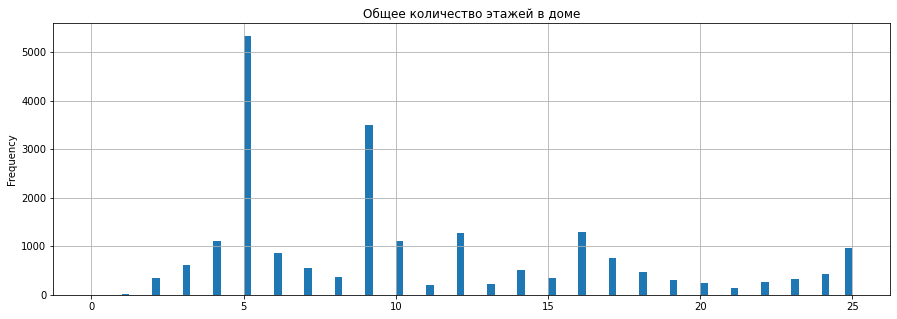

In [140]:
data['floors_total'].plot(kind='hist', title='Общее количество этажей в доме', grid=True, bins=100, range=(0, 25), figsize=(15, 5))

Все логично. Лидируют пятиэтажки, второе место девятиэтажки, третье - шестнадцатиэтажки, ччетвертый пик - 25-этажки.

**Расстояние до центра города в метрах**

<AxesSubplot:title={'center':'Расстояние до центра города в метрах'}, ylabel='Frequency'>

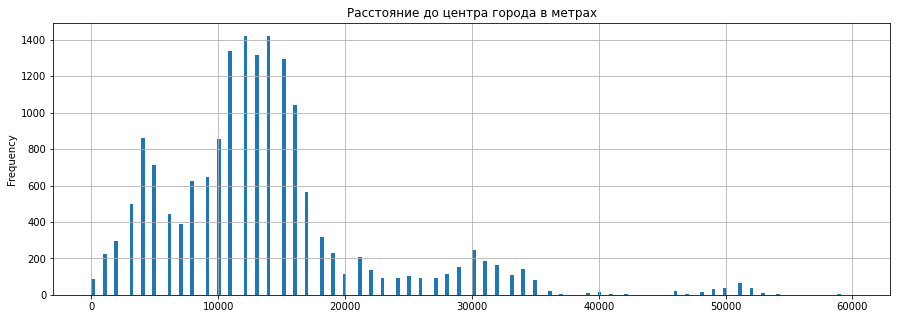

In [141]:
s = data['cityCenters_nearest'] * 1000
s.plot(kind='hist', title='Расстояние до центра города в метрах', grid=True, bins=200, range=(0,60000), figsize=(15, 5))

Несколько локальных пиков. Основной - примерно - 12 - 14 км. Радиус СПб в самом узком месте - около 10 км. В большинстве случаев это от 12-20 км. Следовательно, наибольшей популярностью пользуются квартиры на окраине СПб, что возможно обусловлено их небольшой стоимостью, но об этом будет сказано ниже в исследовании.
Второй и третий локальные максимумы - 30 и 52 км. Это обусловлено локализацией небольших городов в пригороде СПб на таком расстоянии.Четвертый максимум 5-6 км от центра. Квартиры там естественно дороже, поэтому он заметно ниже основного пика. Но сам всплеск обусловлен возможно тем, что радиус 5 км - территория города со старой застройкой (https://www.dvaveka.ru/gravjury/karty-plany-gorodov/plan-goroda-sankt-peterburg-nachala-20-veka/), где квартиры дороже бюджетных советстких новостроек, поэтому так как примерно с 5 км и дальше идет более новая и экономная застройка совесткого времени предложений больше, хотя потом и спадают немного.

**Расстояние до ближайшего аэропорта**

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

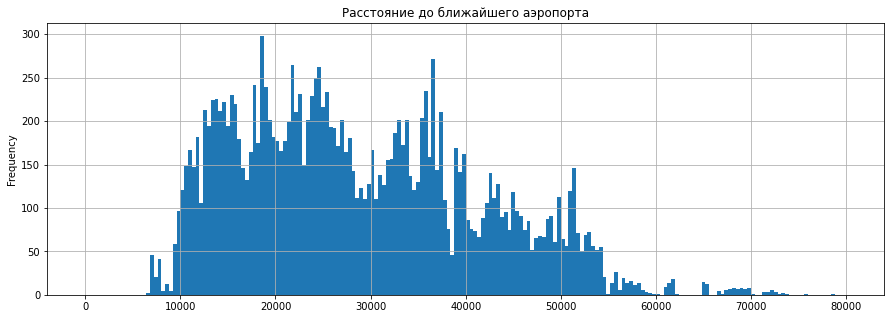

In [142]:
data['airports_nearest'].plot(kind='hist', title='Расстояние до ближайшего аэропорта', grid=True, bins=200, range=(0, 80000), figsize=(15, 5))

Три локальных максимума: 18, 37 и 52 км. 18 км - это как раз расстояние от центра СПб до аэропорта. СПб в диаметре достигает до 40 с небольшим км, поэтому если возьмем крайние районы - выйдет 20 км (удаленность от центра) + 18 км до аэропорта = 37 км. Остальные всплески, в частности, на 40, 50, 70 км - это удаленность от аэропорта квартир в пригородных городах.

**Расстояние до ближайшего парка**

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

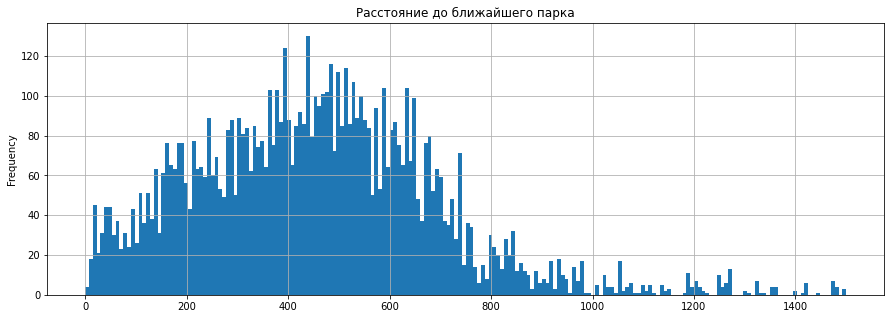

In [143]:
data['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка', grid=True, bins=200, range=(0, 1500), figsize=(15, 5))

Большая часть квартир, которые находястся рядом с парком, расположена примерно в 400-450 м от парка. Без дополнительных данных о стоимости квартиры и прочее, здесь сложно сделать какой-либо еще вывод.

**День публикации объявления**

<AxesSubplot:xlabel='day_week_expos'>

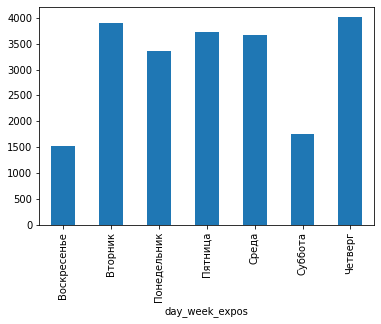

In [144]:
data.groupby('day_week_expos')['day_week_expos'].count().plot(kind='bar')

Объявления неохотно публикуют по выходным. В основной массе публикуют объявления риэлторы, у которых есть график работы, и они, как и все обычные, люди хотят отдыхать.

**Месяц публикации объявления**

<AxesSubplot:title={'center':'Месяц публикации объявления'}, ylabel='Frequency'>

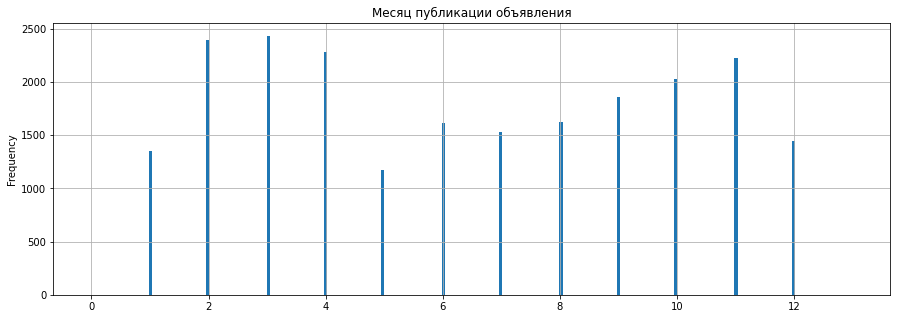

In [145]:
data['month_expos'].plot(kind='hist', title='Месяц публикации объявления', grid=True, bins=200, range=(0, 13), figsize=(15, 5))

Периоды спада публикаций по продажам квартир наблюдаются в декабре-январе (люди готовятся к НГ, сторят планы на отпуск в январские выходные, поэтому никому не до продаж и покупок жилья) и мае - августе (люди уезжают на отдых в майские праздники, а также чаще всего уходят в отпуск с мая по август). Все логично. 

**Как быстро продавались квартиры?**

<AxesSubplot:title={'center':'Период активности объявлений'}, ylabel='Frequency'>

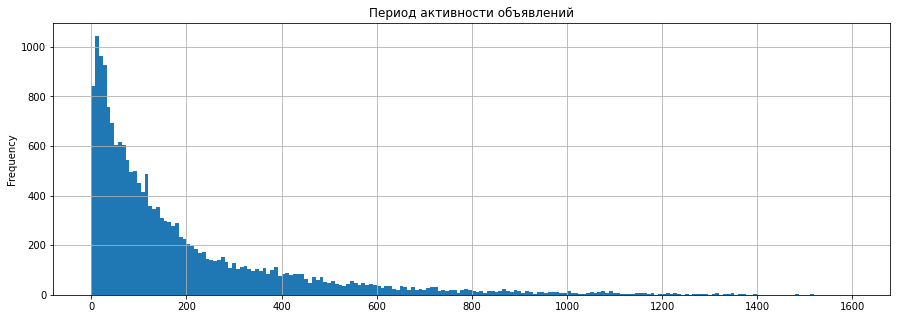

In [146]:
data['days_exposition'].plot(kind='hist', title='Период активности объявлений', grid=True, bins=200, range=(0, 1600), figsize=(15, 5))

In [147]:
len(data.query('days_exposition <= 50')) / len(data)

0.2474471188913202

Почти треть квартир продается не более 50 дней, если считать, что объявления снимаются по причине продажи квартиры.

Среднее значение

In [148]:
data['days_exposition'].mean()

191.95328397166142

Медианное значение

In [149]:
data['days_exposition'].median()

110.0

Среднее почти в два раза превосходит медиану, что обусловлено отдельными большими пиками.

Таким образом, продажа обычно занимает 110 дней.

**Какие продажи можно считать быстрыми, а какие — необычно долгими?**

Оценим минимумы и максимумы:

In [150]:
data['days_exposition'].describe()

count    18773.000000
mean       191.953284
std        225.963251
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрые продажи оценим, изменив диапазон отображения гистограммы от 0 до 50 дней:

<AxesSubplot:title={'center':'Период активности объявлений'}, ylabel='Frequency'>

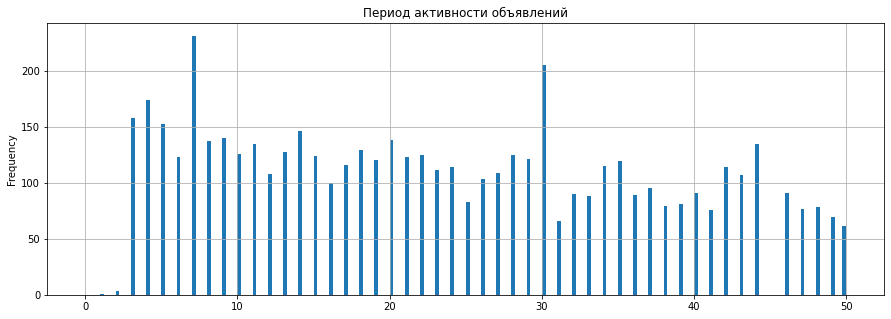

In [151]:
data['days_exposition'].plot(kind='hist', title='Период активности объявлений', grid=True, bins=200, range=(0, 50), figsize=(15, 5))

Есть отдельные  значения продаж в течение 1 и 2 дней. Далее значения имеют большую частоту.

Необычно долгие продажи оценим, изменив диапазон отображения гистограммы от 1000 до 1600:

<AxesSubplot:title={'center':'Период активности объявлений'}, ylabel='Frequency'>

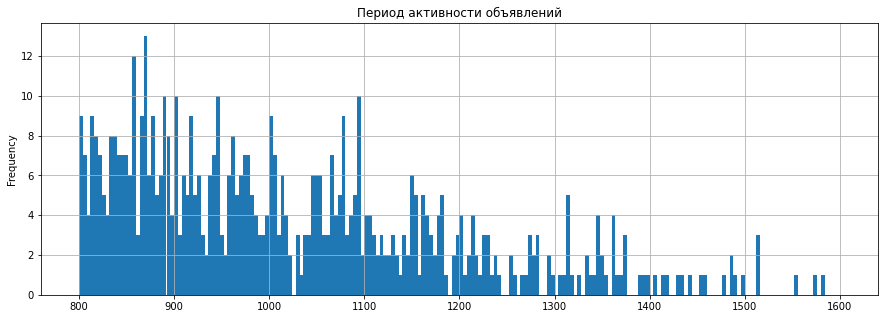

In [152]:
data['days_exposition'].plot(kind='hist', title='Период активности объявлений', grid=True, bins=200, range=(800, 1600), figsize=(15, 5))

После 1400 наблюдаем практически только единичные случае, поэтому выберем его в качестве границы аномально долгих продаж.

Межквартильный размах 252-41 = 211. Полтора интервала: 211 * 1.5 = 316.5. Первая квартиль 41, поэтому низ усов - ноль, верхний ус - 3 квартиль плюс полтора интервала: 252 + 316.5 = 568-569 дней. Исходя из этого расчета необычно долгими продажами примем продажи в течение 568 дней (примерно полтора года). Быстрые - 1-2 дня.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Посчитаем коэффициенты корреляции и для наглядности построим матрицу диаграмм рассеяния, но для начала, чтобы учесть корреляцию по столбцам type_of_floor и day_week_expos, преобразуем их в числа:

In [153]:
data['day_week_expos'] = data['day_week_expos']\
.replace(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], [0, 1, 2, 3, 4, 5, 6])

In [154]:
data['type_of_floor'] = data['type_of_floor']\
.replace(['первый', 'последний', 'другой'], [0, 1, 2])

In [155]:
data1 = data.corr()
data1['last_price'].abs().sort_values(ascending=False) #сортируем и выводим самые большие коэффициенты 
                                                        #с учетом того, что у нас могут быть отрицательные значения
#pd.plotting.scatter_matrix(data1, figsize=(9, 9))

last_price             1.000000
price_sq_metr          0.740039
total_area             0.653942
living_area            0.585878
kitchen_area           0.485191
ceiling_height         0.405417
rooms                  0.365870
cityCenters_nearest    0.205571
ponds_around3000       0.159062
parks_around3000       0.149431
total_images           0.101411
ponds_nearest          0.082953
days_exposition        0.078046
year_expos             0.040463
type_of_floor          0.036748
is_apartment           0.026931
floor                  0.026641
studio                 0.026232
airports_nearest       0.026193
parks_nearest          0.019470
open_plan              0.015675
floors_total           0.008687
balcony                0.006181
month_expos            0.001924
day_week_expos         0.000060
Name: last_price, dtype: float64

Наибольшее влияние оказывают следующие количественные характеристики: price_sq_metr, total_area, living_area, kitchen_area, ceiling_height, rooms.
От даты, месяца и года размещения, типа этажа цена квартиры не зависит.

**Зависимости цены от общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).**

Используем метод pivot_table при построении графиков зависимости цены от интересуемых параметров:

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area'>

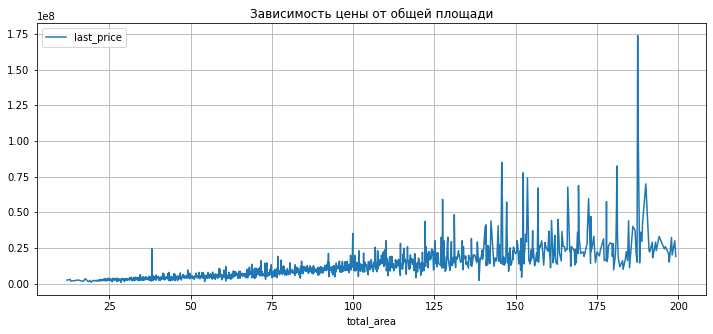

In [156]:
(
    data.query('total_area < 200')
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, title = 'Зависимость цены от общей площади', figsize=(12, 5))
)

Единичные квартиры с очень большой общей площадью искажают график, поэтому сделан срез по значению 200 кв.м.

Виден отчетливый тренд на увеличение стоимости при увеличении общей стоимости.

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='living_area'>

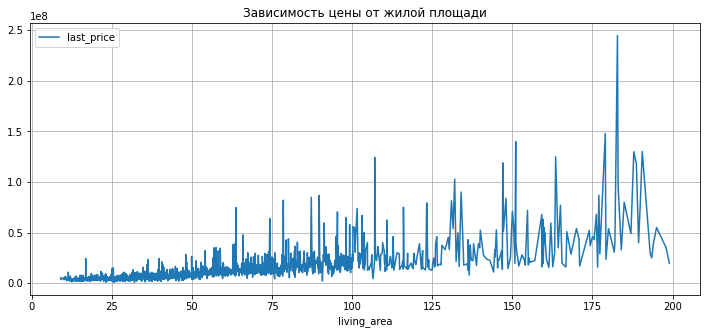

In [157]:
(
    data.query('living_area < 200')
    .pivot_table(index='living_area', values='last_price')
    .plot(grid=True, title = 'Зависимость цены от жилой площади', figsize=(12, 5))
)

Единичные квартиры с очень большой жилой площадью искажают график, поэтому сделан срез по значению 200 кв.м.

Виден тренд на увеличение стоимости при увеличении жилой площади.

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='kitchen_area'>

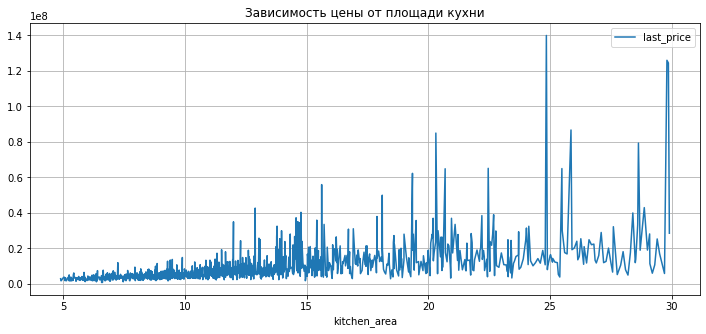

In [158]:
(
    data.query('kitchen_area < 30')
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, title = 'Зависимость цены от площади кухни', figsize=(12, 5))
)

Единичные квартиры с очень большой площадью кухни искажают график, поэтому сделан срез по значению 30 кв.м.

Виден тренд на увеличение стоимости при увеличении площади кухни.

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

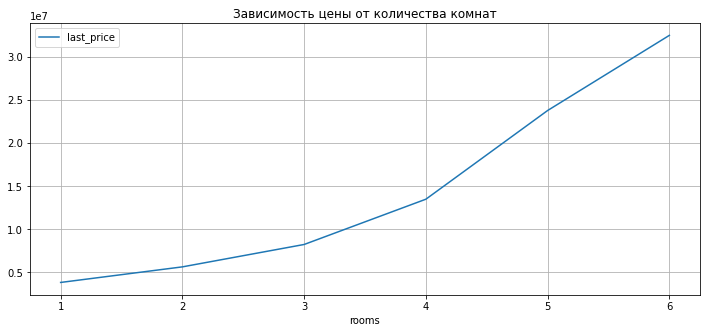

In [159]:
(
    data.query('rooms < 7')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, title = 'Зависимость цены от количества комнат', figsize=(12, 5))
)

Единичные квартиры с очень большим количеством комнат, поэтому сделан срез по значению 7.

Виден тренд на увеличение стоимости при увеличении количества комнат.

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='type_of_floor'>

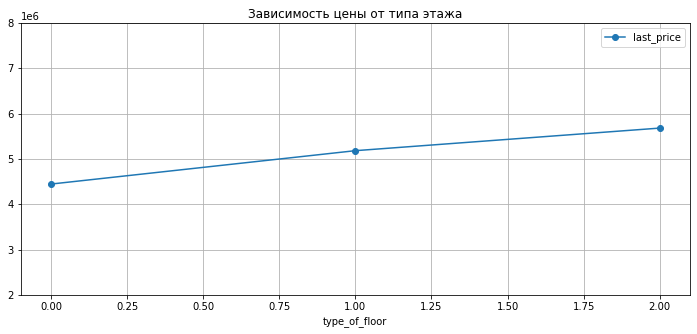

In [160]:
(
    data.query('last_price < 20000000')
    .pivot_table(index='type_of_floor', values='last_price')
    .plot(ylim=(2e6, 8e6), style = 'o-', grid=True, title = 'Зависимость цены от типа этажа', figsize=(12, 5))
)

Несмотря на невысокий коэффициент корреляции Пирсона, можем наблюдать, что квартиры на последнем и другом этажах продаются по более высокой цене. Причины были указаны выше при рассмотрении зависимости количества проданных квартир от типа этажа.

Если мы поднимем планку ценика, то будем наблюдать пик для квартир на последнем этаже, что скорее всего связано с тем, что все дорогие квартиры - пентхаусы на последних двух этажах. 

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='type_of_floor'>

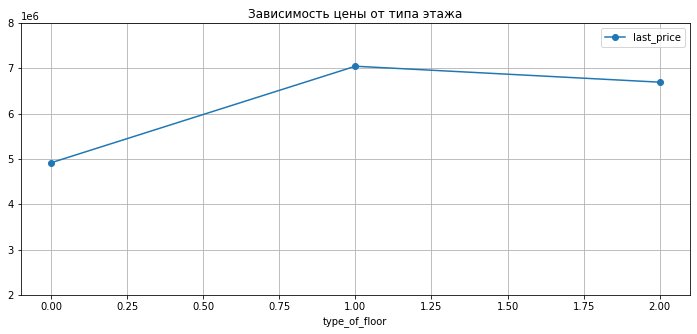

In [161]:
(
    data.query('last_price < 300000000')
    .pivot_table(index='type_of_floor', values='last_price')
    .plot(ylim=(2e6, 8e6), style = 'o-', grid=True, title = 'Зависимость цены от типа этажа', figsize=(12, 5))
)

<AxesSubplot:title={'center':'Зависимость цены от года размещения'}, xlabel='year_expos'>

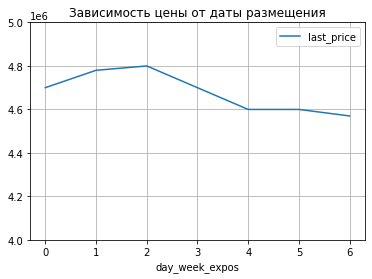

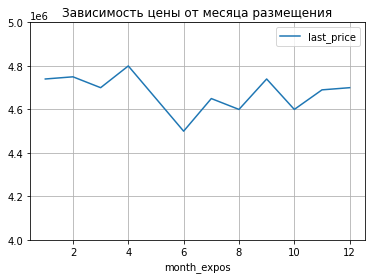

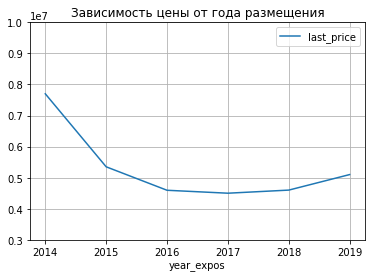

In [162]:
ax = (
    data
    .pivot_table(index='day_week_expos', values='last_price', aggfunc='median')
    .plot(ylim=(4e6, 5e6), grid=True, title = 'Зависимость цены от даты размещения')
)

(
    data
    .pivot_table(index='month_expos', values='last_price', aggfunc='median')
    .plot(ylim=(4e6, 5e6), grid=True, title = 'Зависимость цены от месяца размещения')
)

(
    data
    .pivot_table(index='year_expos', values='last_price', aggfunc='median')
    .plot(ylim=(3e6, 10e6), grid=True, title = 'Зависимость цены от года размещения')
)


На последнем графике есть небольшая обратная зависимость, но в целом зависимость ровная за последние 4 года.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [163]:
s1 = data.pivot_table(index='new_locality', values='price_sq_metr', aggfunc=['mean', 'count'])
s1.columns=['mean', 'count'] #переименуем столбцы, чтобы с помощью sort_values обратитсья к count
print(s1.sort_values(by=['count'], ascending=False).head(10))

                          mean  count
new_locality                         
санкт-петербург  114803.672986  14770
мурино            85829.907104    549
кудрово            95150.82904    427
шушары            78741.845387    401
всеволожск         68686.06267    367
пушкин           103421.886364    352
колпино           75720.189542    306
парголово         90568.769759    291
гатчина           68450.512456    281
выборг             58276.57767    206


**Населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [164]:
s1[(s1['mean'] == s1['mean'].max()) | (s1['mean'] == s1['mean'].min())]

,mean,count
new_locality,,
оредеж,11250.0,1
санкт-петербург,114803.672986,14770


Значение с максимальной стоимостью ожидаемо - это СПб.

**Средняя цена каждого километра в СПб**

In [165]:
s = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index=['cityCenters_nearest'], values=['price_sq_metr', 'last_price'], aggfunc=['mean'])
)
s.columns=['last_price', 'price_sq_metr']
s

,last_price,price_sq_metr
cityCenters_nearest,,
0,23726656.285714,189522.154762
1,18830099.995536,164619.629464
2,16426556.498316,147708.131313
3,13571659.06012,129021.677355
4,13705669.809745,136745.544084
5,15456749.380618,147036.240169
6,14324332.354402,151428.936795
7,12912791.245478,141701.434109
8,8426736.993569,119051.454984


**Зависимость стоимости квартиры от расстояния до центра города**

<AxesSubplot:xlabel='cityCenters_nearest'>

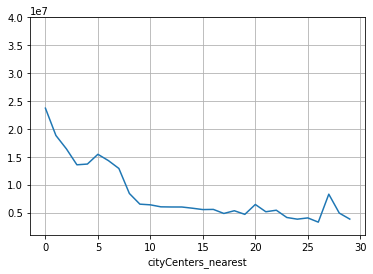

In [166]:
s['last_price'].plot(grid=True, ylim=(1e6, 40e6))

**Промежуточный вывод по шагу 4**

Проведен исследовательский анализ данных.

Изучены следующие параметры объектов: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления:

- пятиэтажки преобладают и все пики графиков (общая площадь; жилая площадь; площадь кухни; количество комнат; высота потолков; этаж квартиры; цена объекта; общее количество этажей в доме) ожидаемы и обусловлены метражом, количеством жилых помещений, характерной стоимостью, этажностью и т.д. таких домов;
- лучше продаются квартиры не на первом и не на последнем этажах из-за минусов, описанных ранее, в то же время для очень дорогих квартир доля последних этажей больше - дорогие двухэтажные пентхаусы располагаются на верхних этажах;
- доля объявлений квартир в СПб больше по сравнению с другими городами, поэтому расстояние до центра в пределах примерного радиуса города имеет пик, то же можно сказать про расстояние до аэропорта. Отдельные небольшие пики на расстояниях 30, 40, 50, 70 км соответствуют локации пригородных городов, где доля квартир больше, чем прилежащих к СПб поселкам, пгт  и тд;
- расстояние до ближайшего парка по большей части составляет около 750 м;
- квартиры публикуют меньше в субботу и воскресенье, у риэлторов - выходные;
- по месяцам спад - декабрь-январь (предновогодний период, новогодние отпуска) и май-август (майские праздники и начало сезона отпусков по август месяц).

- средняя продолжительность продажи квартир 191 день, медиана - 110 дней. Быстрые продажи - в течение 1-2 дней, необычно медленные - свыше 568 дней;

- наибольшее влияние на стоимость объекта оказывают следующие параметры: price_sq_metr, total_area, living_area, kitchen_area, ceiling_height, rooms. От даты, месяца и года размещения, типа этажа цена квартиры не зависит;

- 10 населённых пунктов с наибольшим числом объявлений:
санкт-петербург 114803.672986 14770
мурино 85829.907104 549
кудрово 95150.82904 427
шушары 78741.845387 401
всеволожск 68686.06267 367
пушкин 103421.886364 352
колпино 75720.189542 306
парголово 90568.769759 291
гатчина 68450.512456 281
выборг 58276.57767 206

- населённые пункты с самой высокой и низкой стоимостью квадратного метра: оредеж 11250.0 санкт-петербург 114803.67.

Средняя цена каждого километра логично убывает от центра к периферии за исключением небольших всплесков из-за элитных ЖК в удаленных районах и локальных минимумов - возможно из-за промзон.